FLIGHT PRICE PREDICTION

Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

# New Section

FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 So, We are going to predict now  the price of the flight ticket. 

 

In [1]:
#import all libaries
import pandas as pd
import statistics
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')


In [2]:
#stroing into csv file

df = pd.read_excel(r"/content/Data_train.xlsx")


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.to_csv("Flight_Price_Prediction.csv",sep='\t')

In [5]:
df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

Here Source, Destination,Total_Stops are all the columns which has categorical nominal data type.And Airline, Date_of_Journey, Route,Dep_Time, Arrival_Time, Duration,Additional_Info are the columns which has  categorical ordinal data type.

Our Target column is Price which has continous numeric data type.Hence it is a Regression problem.


In [6]:
df.shape

(10683, 11)

In [7]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

EDA:

In [8]:
#checks nulls values of columns if present any
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
df.apply(lambda x: len(x.unique())) # getting unique values of all the columns

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               129
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           6
Additional_Info      10
Price              1870
dtype: int64

EDA

In [11]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

Here in this column nearly 80% of the data  are having no information that means it is having 80% null values.So we can drop this column

In [12]:
df.drop('Additional_Info',inplace=True,axis=1)

In [13]:
# replace empty values of the columns by mean,most frequent values
import numpy as np
from sklearn.impute import SimpleImputer
for col in ['Total_Stops','Route']:
    imp=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")
    df[col]=imp.fit_transform(df[col].values.reshape(-1,1))

In [14]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [15]:
#As we can see that there are two 'Delhi' values in column we combine them
df['Destination']=df['Destination'].str.replace('New Delhi','Delhi')

In [16]:
#checks nulls values of columns if present any
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [17]:
import calendar
  
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], errors = 'coerce')

# extracting year and month from date
df['month'] = df['Date_of_Journey'].dt.month
df['month']=df['month'].apply(lambda x: calendar.month_abbr[x])




In [18]:
df['year'] = pd.DatetimeIndex(df['Date_of_Journey']).year

In [19]:
df['Route'].value_counts()

DEL → BOM → COK                2377
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → COK → MAA → HYD             1
CCU → IXB → DEL → BLR             1
BOM → JDH → JAI → DEL → HYD       1
BOM → BBI → HYD                   1
BOM → RPR → VTZ → HYD             1
Name: Route, Length: 128, dtype: int64

the most used route is delhi to bombay to cochin

In [20]:
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]

In [21]:
df1=df.copy()

In [22]:
df['year'].unique()

array([2019])

In [23]:
arrival_time=df['Arrival_Time']
df['Arrival_hour']=pd.to_datetime(arrival_time).dt.hour
df['Arrival_minute']=pd.to_datetime(arrival_time).dt.minute

In [24]:
df.drop('Arrival_Time',axis=1,inplace=True)

converted to seperate arrival  hours and minute column and dropped the original one

In [25]:
Depart_time=df['Dep_Time']
df['Departure_hour']=pd.to_datetime(Depart_time).dt.hour
df['Departure_minute']=pd.to_datetime(Depart_time).dt.minute

In [26]:
df.drop('Dep_Time',axis=1,inplace=True)

converted to seperate Departure  hours and minute column and dropped the original one

In [27]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time
# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [28]:
# Adding duration_hours and duration_mins list to train_data dataframe
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [29]:
df.drop(["Duration"], axis = 1, inplace = True)

converted to seperate Duration hours and minute column and dropped the original one

In [30]:
df['Arrival_hour'] = df['Arrival_hour'] * 60

In [31]:
df['Arrival_time_n_minutes']=df['Arrival_hour']+df['Arrival_minute']

In [32]:
df.drop(['Arrival_hour','Arrival_minute'], axis = 1, inplace = True)

converted to  Arrival_time_n_minutes column and dropped the previous one

In [33]:
df['Departure_hour'] = df['Departure_hour'] * 60

In [34]:
df['Departure_time_n_minutes']=df['Departure_hour']+df['Departure_minute']

In [35]:
df.drop(['Departure_hour','Departure_minute'], axis = 1, inplace = True)

converted to Departure_time_n_minutes column and dropped the previous one

In [36]:
df['Duration_hours'] = df['Duration_hours'] * 60

In [37]:
df['Duration_time_n_minutes']=df['Duration_hours']+df['Duration_mins']

In [38]:
df.drop(['Duration_hours','Duration_mins'], axis = 1, inplace = True)

converted to Duration_time_n_minutes column and dropped the previous one

In [39]:
# separate journey day and month from journey_date
df['day'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day
df['Month'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month


In [40]:
df['Total_Stops'].value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

one stop happend is more 

In [41]:
# replace the values of total steps
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [42]:
df['Route1']=df['Route'].str.split('→').str[0]
df['Route2']=df['Route'].str.split('→').str[1]
df['Route3']=df['Route'].str.split('→').str[2]
df['Route4']=df['Route'].str.split('→').str[3]
df['Route5']=df['Route'].str.split('→').str[4]

converted to seperate routes

In [43]:
df.drop(["Route"], axis = 1, inplace = True)

In [44]:
df.isnull().sum()

Airline                         0
Date_of_Journey                 0
Source                          0
Destination                     0
Total_Stops                     0
Price                           0
month                           0
year                            0
Arrival_time_n_minutes          0
Departure_time_n_minutes        0
Duration_time_n_minutes         0
day                             0
Month                           0
Route1                          0
Route2                          0
Route3                       3491
Route4                       9117
Route5                      10637
dtype: int64

In [45]:
for i in ['Route3', 'Route4', 'Route5']:
    df[i].fillna('None',inplace=True)

fills with none value if route is not present

In [46]:
for i in df.columns:
    print('{} has total {} categories'.format(i,len(df[i].value_counts())))

Airline has total 12 categories
Date_of_Journey has total 40 categories
Source has total 5 categories
Destination has total 5 categories
Total_Stops has total 5 categories
Price has total 1870 categories
month has total 7 categories
year has total 1 categories
Arrival_time_n_minutes has total 223 categories
Departure_time_n_minutes has total 222 categories
Duration_time_n_minutes has total 368 categories
day has total 9 categories
Month has total 7 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


In [47]:
df.groupby(['Airline'])['Price'].agg({'mean','sum','count'})

mean  count       sum
Airline                                                         
Air Asia                            5590.260188    319   1783293
Air India                           9611.210616   1752  16838841
GoAir                               5861.056701    194   1137045
IndiGo                              5673.682903   2053  11648071
Jet Airways                        11643.923357   3849  44817461
Jet Airways Business               58358.666667      6    350152
Multiple carriers                  10902.678094   1196  13039603
Multiple carriers Premium economy  11418.846154     13    148445
SpiceJet                            4338.284841    818   3548717
Trujet                              4140.000000      1      4140
Vistara                             7796.348643    479   3734451
Vistara Premium economy             8962.333333      3     26887

displays flight wise total price ,mean price and and no of flights in total

In [48]:
def pod(x):
    if (x > 240) and (x <= 480):
        return 'Early Morning'
    elif (x > 480) and (x <= 720 ):
        return 'Morning'
    elif (x > 720) and (x <= 960):
        return'Noon'
    elif (x > 960) and (x <= 1200) :
        return 'Eve'
    elif (x > 1200) and (x <= 1440):
        return'Night'
    elif (x <= 240):
        return'Late Night'

In [49]:
df['Departure_Part_of_day']=df['Departure_time_n_minutes'].apply(pod)

In [50]:
df['Arrival_Part_of_day']=df['Arrival_time_n_minutes'].apply(pod)

caluclate day timings for only analysis purpose

In [51]:
df

Airline Date_of_Journey    Source Destination  Total_Stops  Price  \
0           IndiGo      2019-03-24  Banglore       Delhi            0   3897   
1        Air India      2019-01-05   Kolkata    Banglore            2   7662   
2      Jet Airways      2019-09-06     Delhi      Cochin            2  13882   
3           IndiGo      2019-12-05   Kolkata    Banglore            1   6218   
4           IndiGo      2019-01-03  Banglore       Delhi            1  13302   
...            ...             ...       ...         ...          ...    ...   
10678     Air Asia      2019-09-04   Kolkata    Banglore            0   4107   
10679    Air India      2019-04-27   Kolkata    Banglore            0   4145   
10680  Jet Airways      2019-04-27  Banglore       Delhi            0   7229   
10681      Vistara      2019-01-03  Banglore       Delhi            0  12648   
10682    Air India      2019-09-05     Delhi      Cochin            2  11753   

      month  year  Arrival_time_n_minutes  Departure_time_n_minutes  \
0       Mar  2019                      70                      1340   
1       Jan  2019                     795                       350   
2       Sep  2019                     265                       565   
3       Dec  2019                    1410                      1085   
4       Jan  2019                    1295                      1010   
...     ...   ...                     ...                       ...   
10678   Sep  2019                    1345                      1195   
10679   Apr  2019                    1400                      1245   
10680   Apr  2019                     680                       500   
10681   Jan  2019                     850                       690   
10682   Sep  2019                    1155                       655   

       Duration_time_n_minutes  day  Month Route1 Route2 Route3 Route4 Route5  \
0                          170   24      3   BLR     DEL   None   None   None   
1                          445    5      1   CCU    IXR    BBI     BLR   None   
2                         1140    6      9   DEL    LKO    BOM     COK   None   
3                          325    5     12   CCU    NAG     BLR   None   None   
4                          285    3      1   BLR    NAG     DEL   None   None   
...                        ...  ...    ...    ...    ...    ...    ...    ...   
10678                      150    4      9   CCU     BLR   None   None   None   
10679                      155   27      4   CCU     BLR   None   None   None   
10680                      180   27      4   BLR     DEL   None   None   None   
10681                      160    3      1   BLR     DEL   None   None   None   
10682                      500    5      9   DEL    GOI    BOM     COK   None   

      Departure_Part_of_day Arrival_Part_of_day  
0                     Night          Late Night  
1             Early Morning                Noon  
2                   Morning       Early Morning  
3                       Eve               Night  
4                       Eve               Night  
...                     ...                 ...  
10678                   Eve               Night  
10679                 Night               Night  
10680               Morning             Morning  
10681               Morning                Noon  
10682               Morning                 Eve  

[10683 rows x 20 columns]

In [52]:
df = df.set_index('Date_of_Journey')

In [53]:
price_flight=df.groupby(['Airline','Price']).size().sort_values(0, ascending=False).reset_index()
price_flight

Airline  Price    0
0     Jet Airways  10262  258
1     Jet Airways  10844  212
2     Jet Airways   7229  162
3          IndiGo   4804  160
4          IndiGo   4823  131
...           ...    ...  ...
1973       IndiGo   8618    1
1974       IndiGo   8626    1
1975       IndiGo   8662    1
1976       IndiGo   8707    1
1977       IndiGo   7681    1

[1978 rows x 3 columns]

displays most cost flight and their counts

In [54]:
price_month=df.groupby(['month','Price']).size().sort_values(0, ascending=False).reset_index()
price_month

month  Price    0
0      Jun  10262  138
1      May  10844  112
2      May  12898   81
3      May  15129   63
4      Jun   4804   55
...    ...    ...  ...
3385   Mar   9042    1
3386   Mar   9029    1
3387   Mar   9027    1
3388   Mar   8971    1
3389   Mar   6101    1

[3390 rows x 3 columns]

displays month wise flights and their price

In [55]:
time_dept=df.groupby(['Source','Total_Stops']).size().sort_values(0, ascending=False).reset_index()

time_dept

Source  Total_Stops     0
0      Delhi            1  3186
1    Kolkata            1  1834
2   Banglore            0  1552
3      Delhi            2  1113
4    Kolkata            0   724
5     Mumbai            0   621
6   Banglore            1   562
7    Chennai            0   381
8    Kolkata            2   302
9      Delhi            0   213
10  Banglore            2    75
11    Mumbai            1    44
12    Mumbai            2    30
13     Delhi            3    25
14   Kolkata            3    11
15  Banglore            3     7
16    Mumbai            3     2
17  Banglore            4     1

this tells how many flights starts at source and total stops of it

In [56]:
time_arr=df.groupby([ 'Destination','Total_Stops']).size().sort_values(0, ascending=False).reset_index()
time_arr

Destination  Total_Stops     0
0       Cochin            1  3186
1     Banglore            1  1834
2        Delhi            0  1552
3       Cochin            2  1113
4     Banglore            0   724
5    Hyderabad            0   621
6        Delhi            1   562
7      Kolkata            0   381
8     Banglore            2   302
9       Cochin            0   213
10       Delhi            2    75
11   Hyderabad            1    44
12   Hyderabad            2    30
13      Cochin            3    25
14    Banglore            3    11
15       Delhi            3     7
16   Hyderabad            3     2
17       Delhi            4     1

this tells how many flights stops at destination and total stops of it

In [57]:
#Looking at below claim_amount:
month_wise=pd.pivot_table(df,values='Price',index=['month','Airline','Source','Destination']).sort_values('Price',ascending=True)

cm=sns.light_palette("black", as_cmap=True)
month_wise.style.background_gradient(cmap=cm)

this tells flight goes from which city to which city and their price

In [58]:
#Looking at below claim_amount:
month_wise_order=pd.pivot_table(df1,values='Price',index=['month','Airline','Source','Destination','Dep_Time', 'Arrival_Time']).sort_values('Price',ascending=True)

cm=sns.light_palette("black", as_cmap=True)
month_wise_order.style.background_gradient(cmap=cm)

this tells flight with minimum charge and starts from which place and goes to which place and their prices and timings

In [59]:
flight_route=df1.groupby(['Airline','Source', 'Destination','Route','month']).size().sort_values(0, ascending=False).reset_index()
flight_route

Airline   Source Destination  \
0          Multiple carriers    Delhi      Cochin   
1                Jet Airways  Kolkata    Banglore   
2          Multiple carriers    Delhi      Cochin   
3                Jet Airways    Delhi      Cochin   
4          Multiple carriers    Delhi      Cochin   
..                       ...      ...         ...   
819                Air India  Kolkata    Banglore   
820                Air India  Kolkata    Banglore   
821              Jet Airways   Mumbai   Hyderabad   
822                Air India  Kolkata    Banglore   
823  Vistara Premium economy  Chennai     Kolkata   

                           Route month    0  
0                DEL → BOM → COK   Jun  294  
1                CCU → BOM → BLR   May  283  
2                DEL → BOM → COK   May  255  
3                DEL → BOM → COK   Jun  247  
4                DEL → BOM → COK   Mar  220  
..                           ...   ...  ...  
819  CCU → BBI → IXR → DEL → BLR   Mar    1  
820  CCU → BBI → IXR → DEL → BLR   Dec    1  
821        BOM → VNS → DEL → HYD   Dec    1  
822        CCU → BBI → HYD → BLR   Jun    1  
823                    MAA → CCU   Jan    1  

[824 rows x 6 columns]

tells flights goes in which route in which month

In [60]:
flight_route=df1.groupby(['Airline','Source', 'Destination','Route','month','Price']).size().sort_values(0, ascending=False).reset_index()
flight_route

Airline    Source Destination            Route month  Price    0
0     Jet Airways     Delhi      Cochin  DEL → BOM → COK   Jun  10262  138
1     Jet Airways   Kolkata    Banglore  CCU → BOM → BLR   May  10844  112
2     Jet Airways     Delhi      Cochin  DEL → BOM → COK   May  12898   81
3          IndiGo   Kolkata    Banglore        CCU → BLR   Jun   4804   55
4     Jet Airways  Banglore       Delhi  BLR → BOM → DEL   Mar   7832   46
...           ...       ...         ...              ...   ...    ...  ...
3563       IndiGo   Kolkata    Banglore  CCU → HYD → BLR   May   5170    1
3564       IndiGo   Kolkata    Banglore  CCU → HYD → BLR   May   4775    1
3565       IndiGo   Kolkata    Banglore  CCU → HYD → BLR   May   3809    1
3566       IndiGo   Kolkata    Banglore  CCU → HYD → BLR   May   3717    1
3567       IndiGo     Delhi      Cochin  DEL → PNQ → COK   May   8745    1

[3568 rows x 7 columns]

In [61]:
df['month'].value_counts()

Jun    2536
Mar    2211
May    2074
Sep    1406
Jan    1075
Dec     957
Apr     424
Name: month, dtype: int64

most flights goes in june month

In [62]:
coll_df=df[['Airline','month']]
res_df=coll_df.loc[coll_df['month']=='Jun']
res_df['Airline'].value_counts()

Jet Airways                931
IndiGo                     469
Air India                  386
Multiple carriers          341
SpiceJet                   190
Vistara                    102
Air Asia                    69
GoAir                       45
Trujet                       1
Jet Airways Business         1
Vistara Premium economy      1
Name: Airline, dtype: int64

jet airways goes mostly

In [63]:
df.reset_index(level =['Date_of_Journey'], inplace = True)

In [64]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['dayOfWeek'] = df['Date_of_Journey'].dt.day_name()
  

VISUALIZATION

In [65]:
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


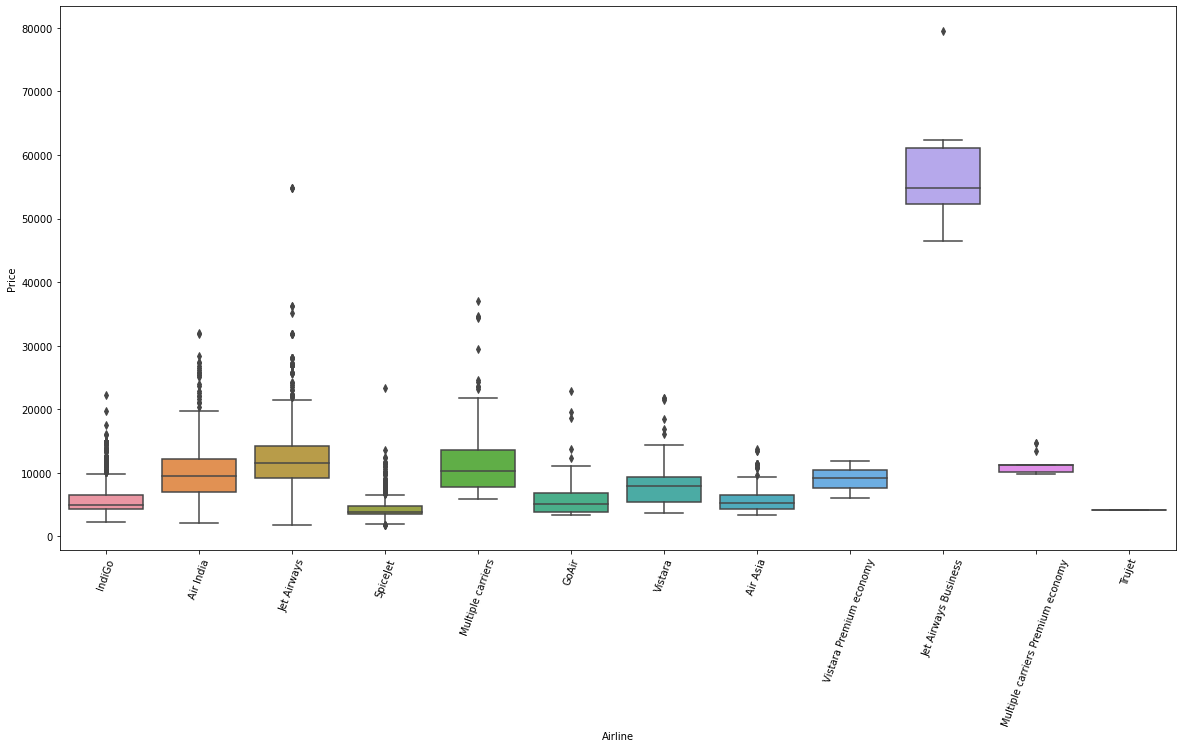

In [66]:
# airline vs price

print(df['Airline'].value_counts())
plt.figure(figsize=(20,10))
plt.xticks(rotation=70)
sns.boxplot(x='Airline', y='Price', data=df)

tells flights and their prices

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


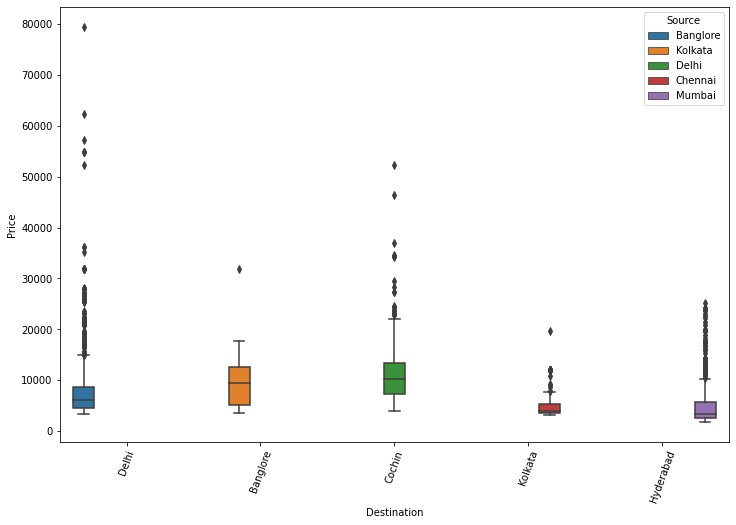

In [67]:
# source vs price

print(df['Source'].value_counts())

plt.figure(figsize=(12,8))
plt.xticks(rotation=70)
sns.boxplot(x='Destination',y='Price',hue='Source',data=df)

displays price for source to destination

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


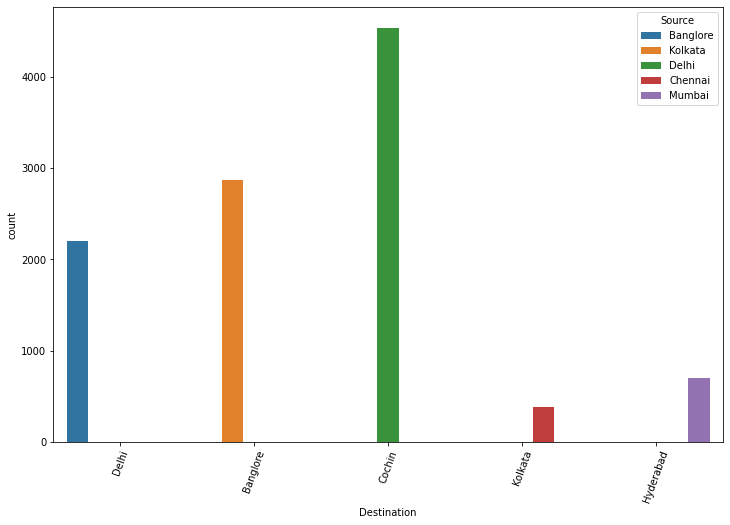

In [68]:
# source vs price

print(df['Source'].value_counts())

plt.figure(figsize=(12,8))
plt.xticks(rotation=70)
sns.countplot(x='Destination',hue='Source',data=df)

displays source to destination and its counts

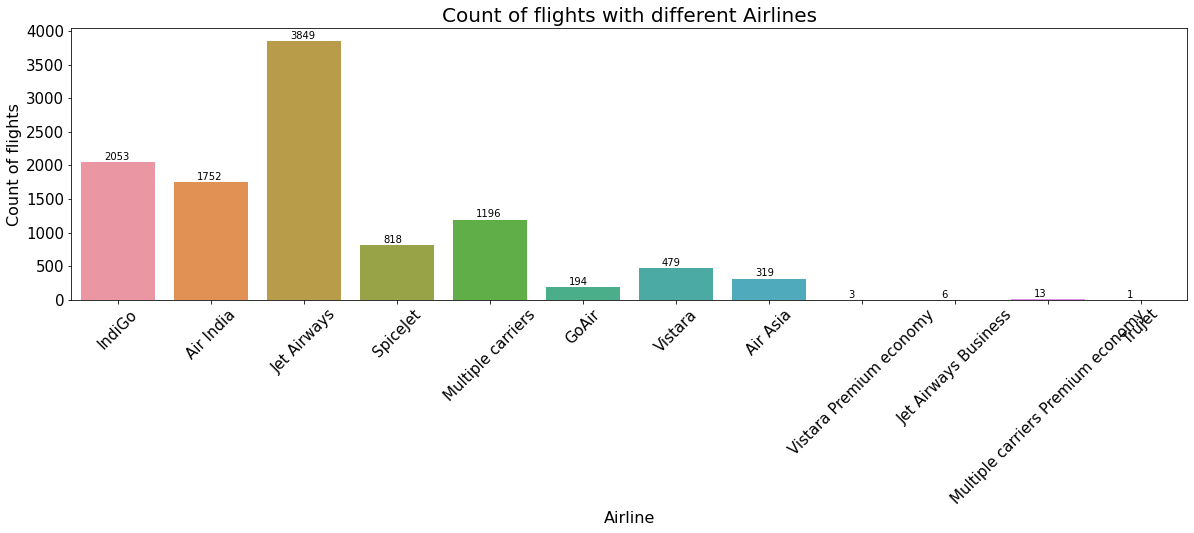

In [69]:
# Count of flights with different airlines

plt.figure(figsize = (20,5))
ax = sns.countplot(x = 'Airline', data = df);
plt.title('Count of flights with different Airlines', fontsize= 20);
plt.xlabel('Airline', fontsize= 16);
plt.ylabel('Count of flights', fontsize= 16);
plt.xticks(rotation = 45, fontsize= 15);
plt.yticks(fontsize= 15);
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
plt.show();

jetairways goes mostly and least going is multiple carriers flight

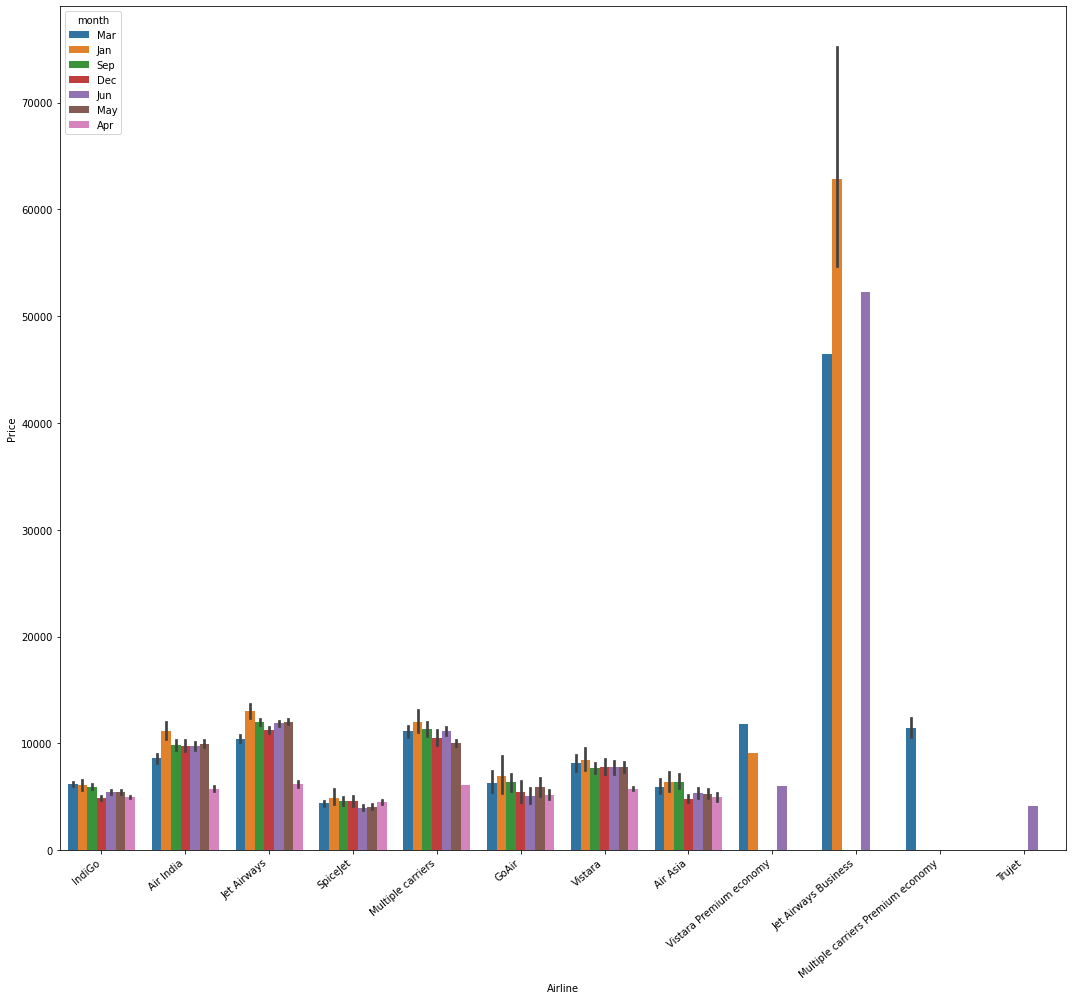

In [70]:
plt.figure(figsize=(15,14))
#now lets check the day of the journey relation with the output price column
ax=sns.barplot(x='Airline',y='Price',hue='month',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

displays count of flights in different months

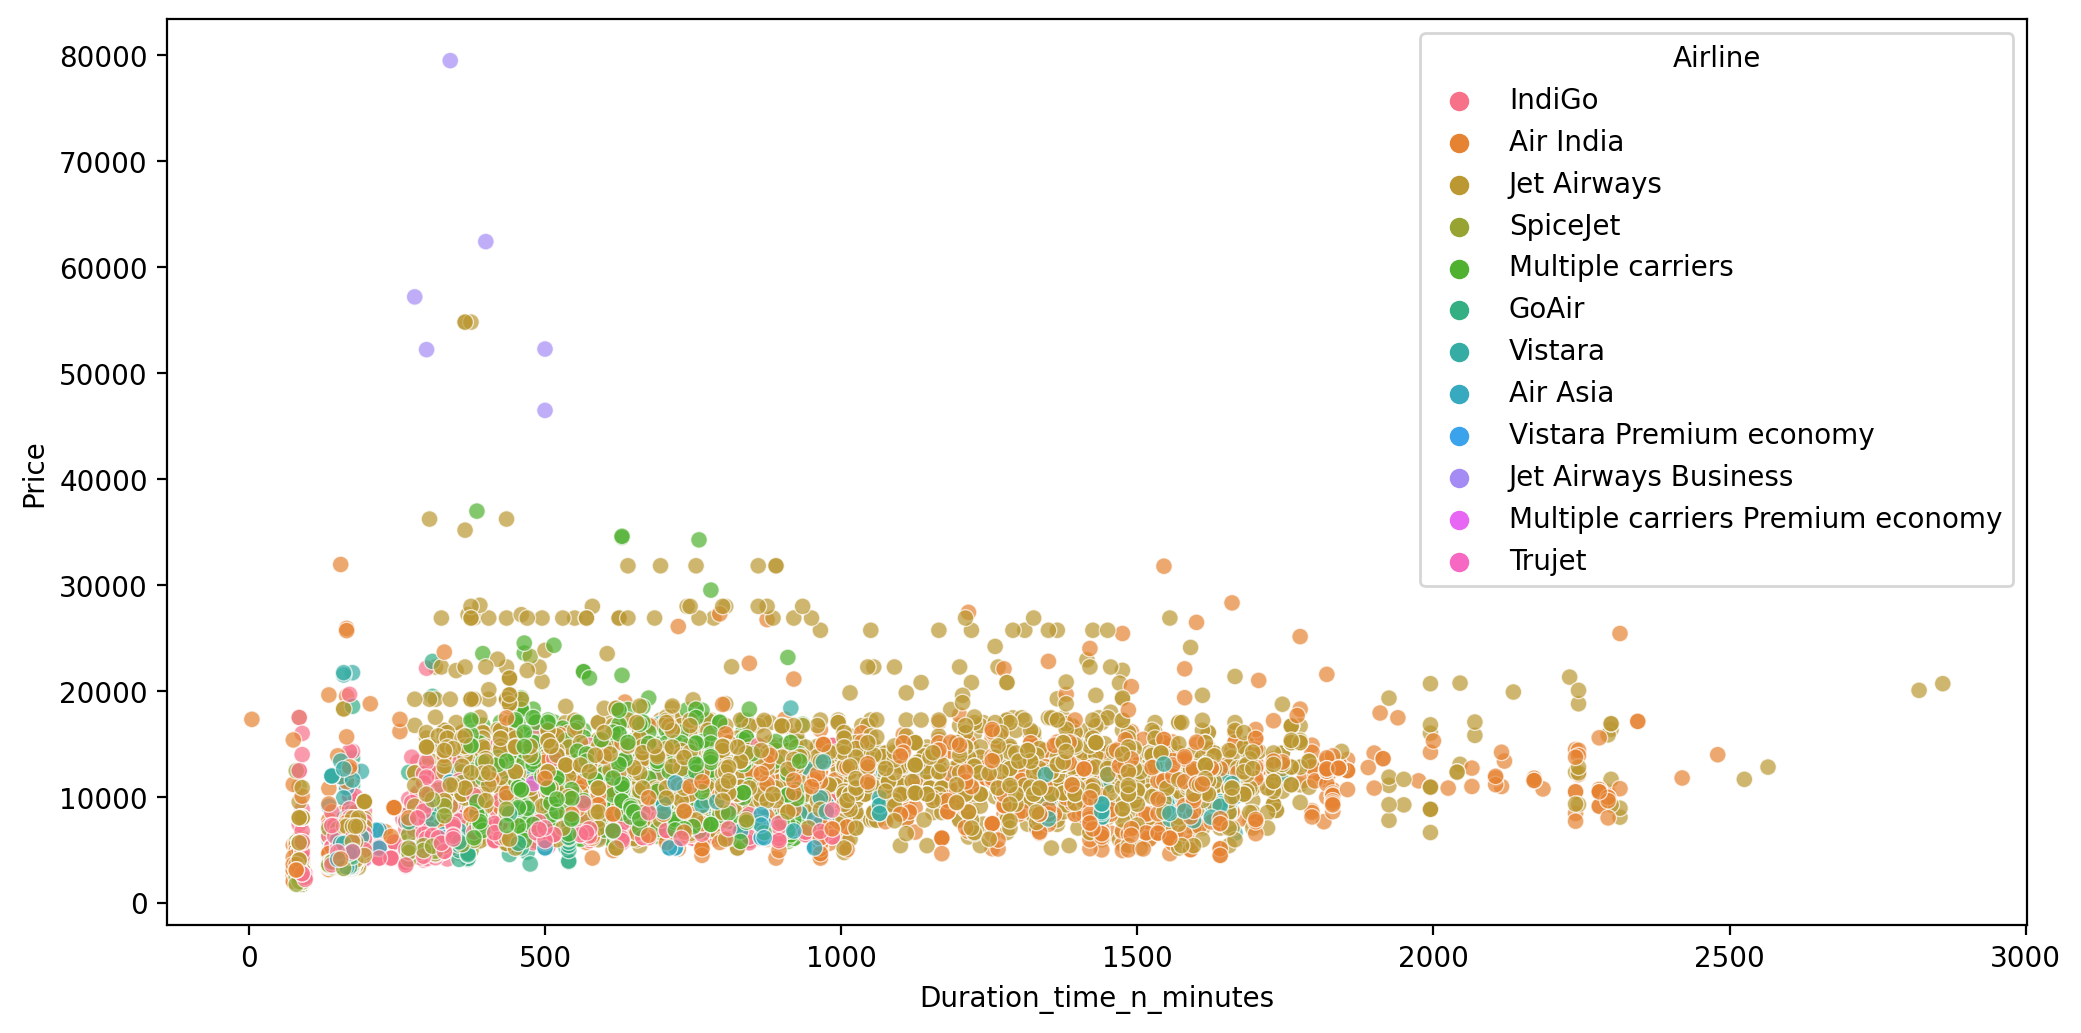

In [71]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(x='Duration_time_n_minutes',y='Price',data=df,hue='Airline',alpha=0.7,legend='brief');

displays flights and its duration and its prices

In [72]:
px.histogram(df, 
             x='day', 
             color='Source',
             title='Source vs.journey_day')

displays flights starts at source in which days

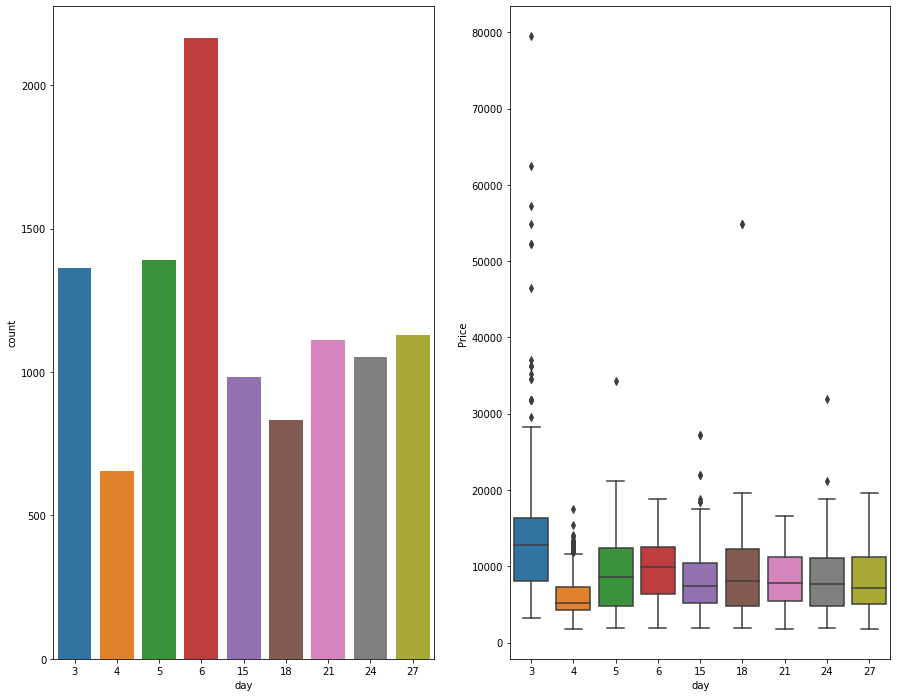

In [73]:
f, axes = plt.subplots(1, 2,figsize=(15,12))
sns.countplot(x = 'day', data = df,ax =axes[0]);
sns.boxplot(df['day'],df['Price'], ax =axes[1])

displays flights at different days and its counts and prices

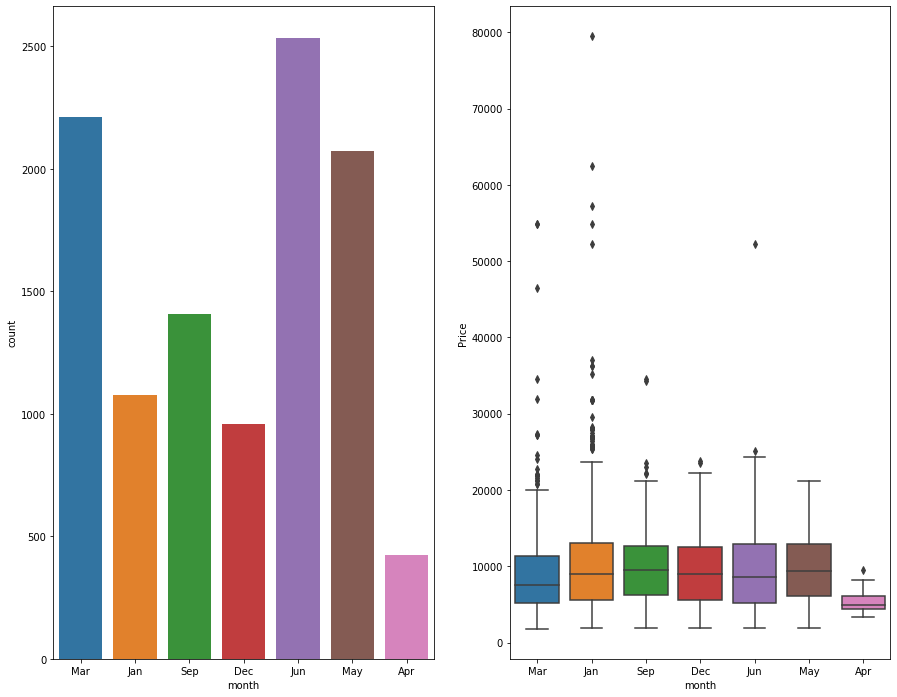

In [74]:
f, axes = plt.subplots(1, 2,figsize=(15,12))
sns.countplot(x = 'month', data = df,ax =axes[0]);
sns.boxplot(df['month'],df['Price'], ax =axes[1])

displays flights at different months and its counts and prices

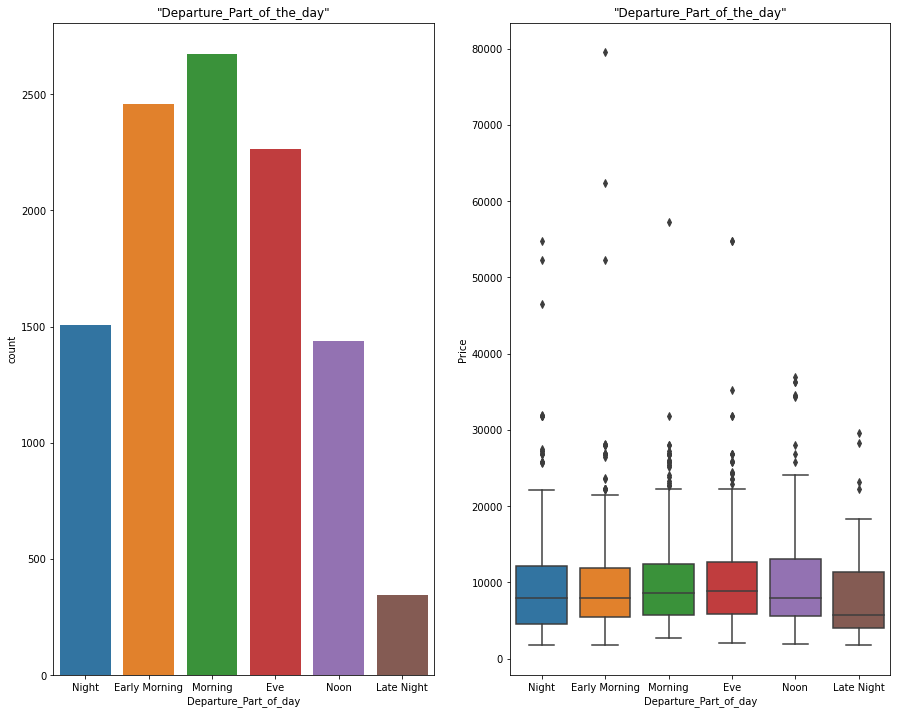

In [75]:
f, axes = plt.subplots(1, 2,figsize=(15,12))
ax=sns.countplot(x = 'Departure_Part_of_day', data = df,ax =axes[0]);
ax.set_title('"Departure_Part_of_the_day"');
ax=sns.boxplot(df['Departure_Part_of_day'],df['Price'], ax =axes[1])
ax.set_title('"Departure_Part_of_the_day"');
            


displays flights at different Departure_Part_of_the_day and its counts and prices

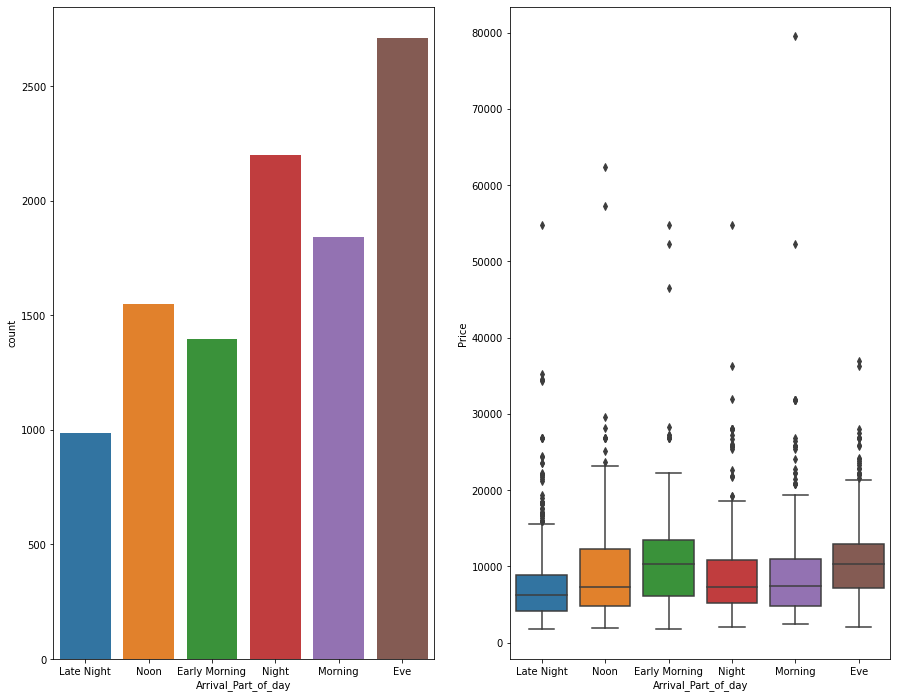

In [76]:
f, axes = plt.subplots(1, 2,figsize=(15,12))
sns.countplot(x = 'Arrival_Part_of_day', data = df,ax =axes[0]);
ax.set_title('Arrival_Part_of_the_day');
sns.boxplot(df['Arrival_Part_of_day'],df['Price'], ax =axes[1])
ax.set_title('Arrival_Part_of_the_day');

displays flights at different Arrival_Part_of_the_day and its counts and prices

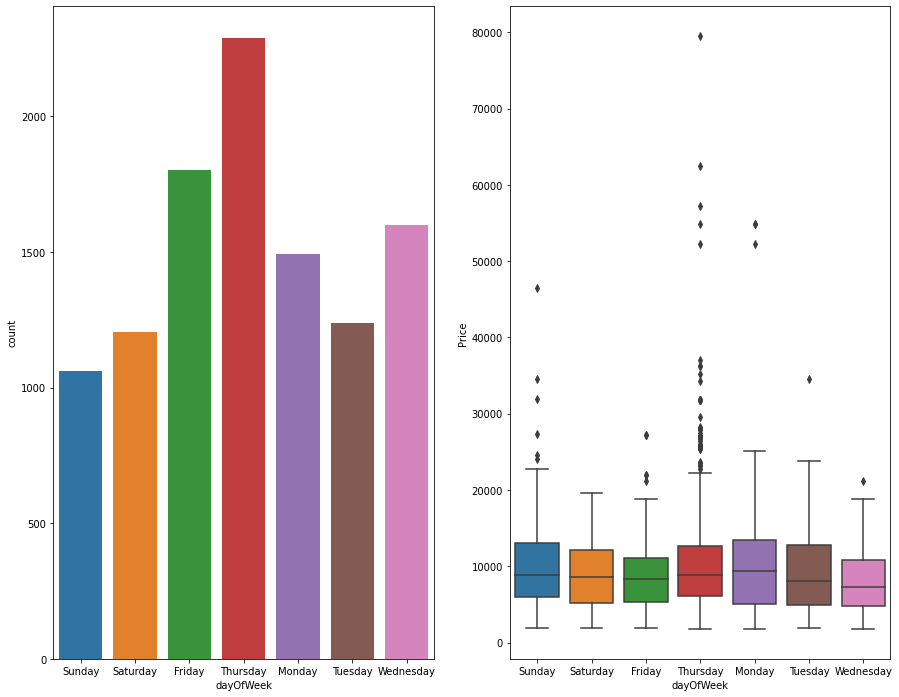

In [77]:
f, axes = plt.subplots(1, 2,figsize=(15,12))
sns.countplot(x = 'dayOfWeek', data = df,ax =axes[0]);
sns.boxplot(df['dayOfWeek'],df['Price'], ax =axes[1])


displays flights at different days_of_the_week and its counts and prices

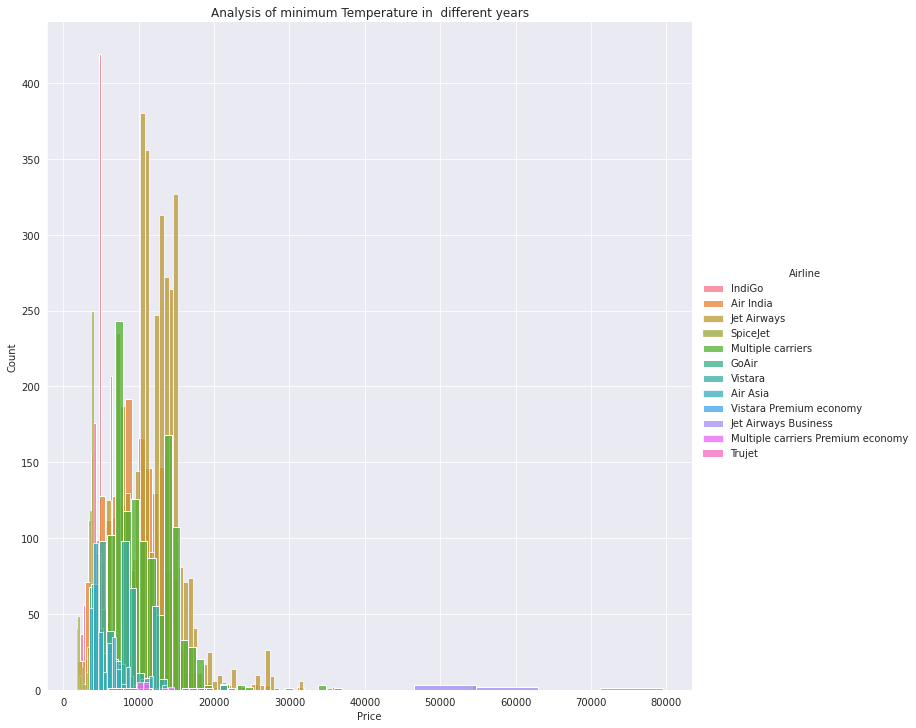

In [78]:
# For Apparent Temperature (C)
sns.set_style("darkgrid")
sns.FacetGrid(df, hue="Airline", height=10).map(sns.histplot, "Price").add_legend()
plt.title("Analysis of minimum Temperature in  different years")
# save the figure
plt.savefig('plot4.png', dpi=300, bbox_inches='tight')
plt.show()


jetairways goes mostly and its price is high

In [79]:
df.drop(['Date_of_Journey','Departure_Part_of_day', 'Arrival_Part_of_day','dayOfWeek','month'], axis = 1, inplace = True)

drop the columns which created only for analysis purpose

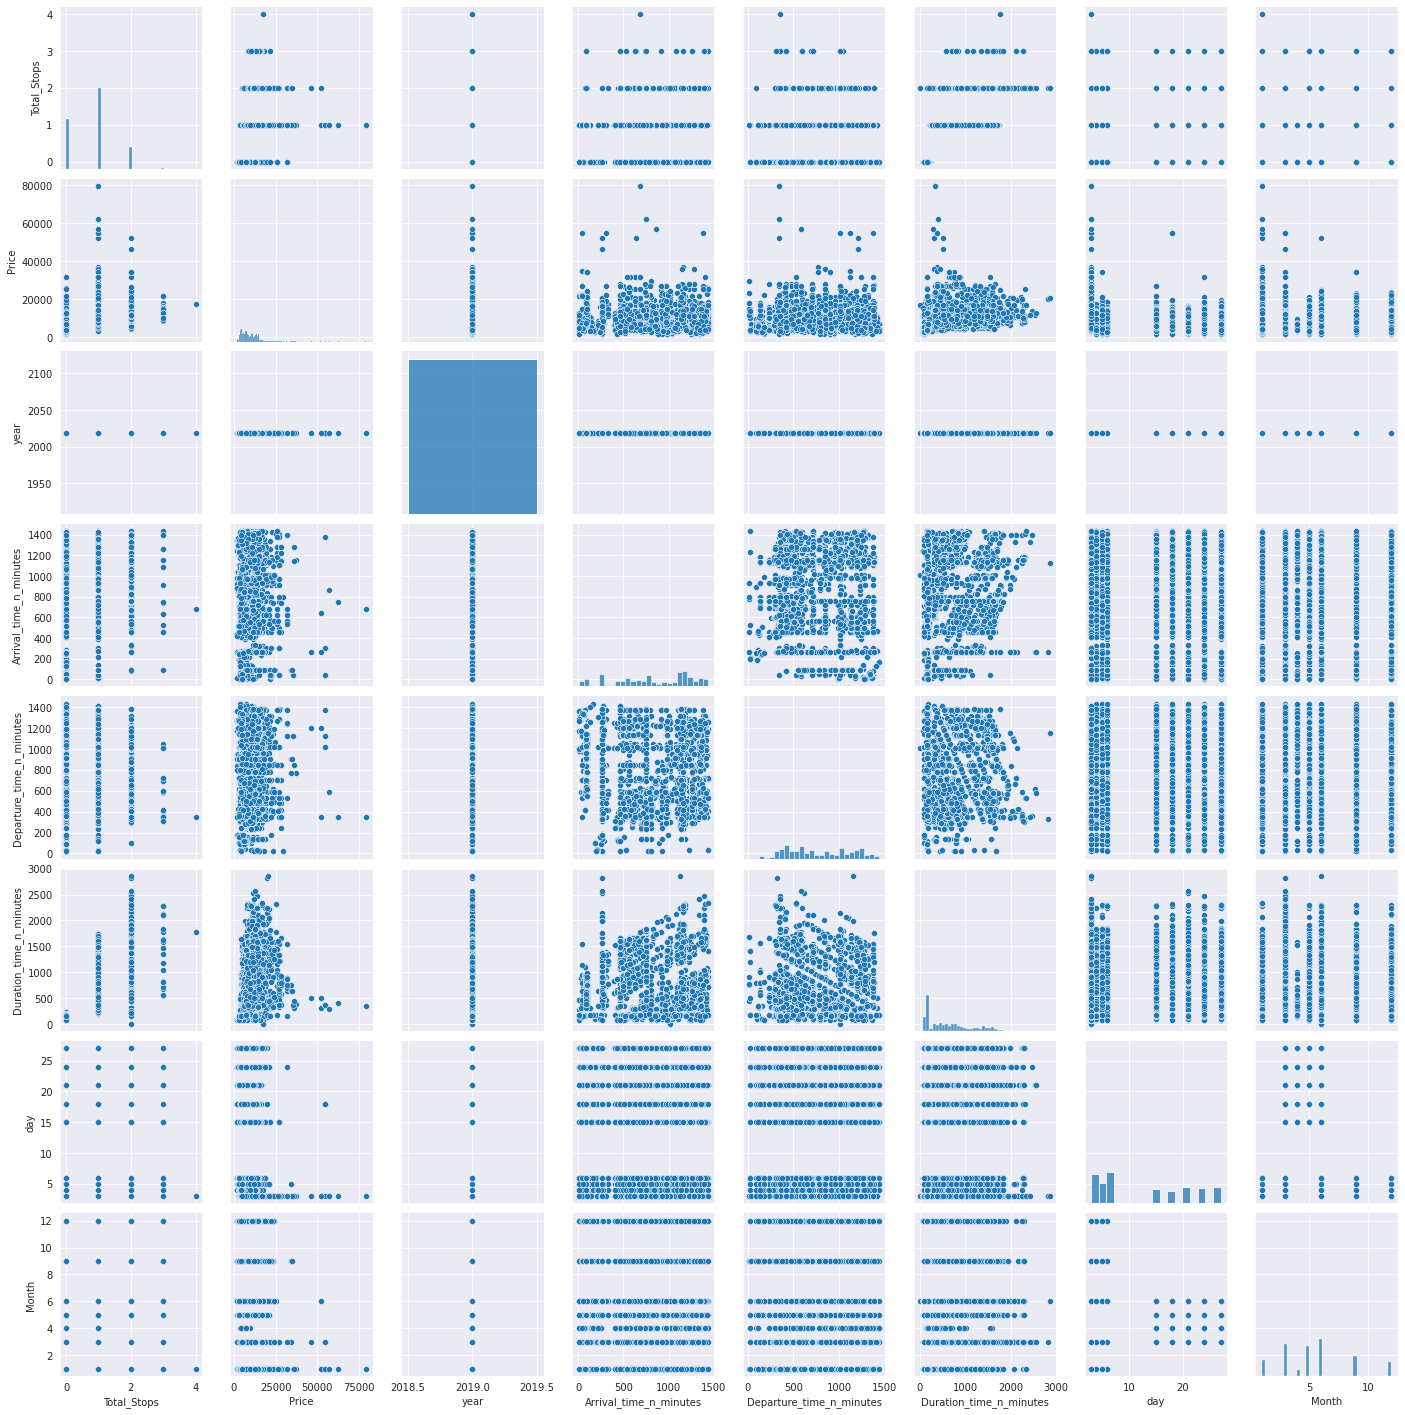

In [80]:
sns.pairplot(df, palette='husl')
sns.despine()

displays if arrival time increases then duration increases and shows price details with month and all other deatils

DATA PREPROCESSING AND FEATURE ENGINEERING

In [81]:
df.dtypes

Airline                     object
Source                      object
Destination                 object
Total_Stops                  int64
Price                        int64
year                         int64
Arrival_time_n_minutes       int64
Departure_time_n_minutes     int64
Duration_time_n_minutes      int64
day                          int64
Month                        int64
Route1                      object
Route2                      object
Route3                      object
Route4                      object
Route5                      object
dtype: object

In [82]:
#converting string data type to int type using LabelEncoding
le=LabelEncoder()

list1=['Airline', 'Source', 'Destination','Route1', 'Route2', 'Route3','Route4', 'Route5']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
df

Airline  Source  Destination  Total_Stops  Price  year  \
0            3       0            2            0   3897  2019   
1            1       3            0            2   7662  2019   
2            4       2            1            2  13882  2019   
3            3       3            0            1   6218  2019   
4            3       0            2            1  13302  2019   
...        ...     ...          ...          ...    ...   ...   
10678        0       3            0            0   4107  2019   
10679        1       3            0            0   4145  2019   
10680        4       0            2            0   7229  2019   
10681       10       0            2            0  12648  2019   
10682        1       2            1            2  11753  2019   

       Arrival_time_n_minutes  Departure_time_n_minutes  \
0                          70                      1340   
1                         795                       350   
2                         265                       565   
3                        1410                      1085   
4                        1295                      1010   
...                       ...                       ...   
10678                    1345                      1195   
10679                    1400                      1245   
10680                     680                       500   
10681                     850                       690   
10682                    1155                       655   

       Duration_time_n_minutes  day  Month  Route1  Route2  Route3  Route4  \
0                          170   24      3       0      13      29      13   
1                          445    5      1       2      25       1       3   
2                         1140    6      9       3      32       4       5   
3                          325    5     12       2      34       3      13   
4                          285    3      1       0      34       8      13   
...                        ...  ...    ...     ...     ...     ...     ...   
10678                      150    4      9       2       5      29      13   
10679                      155   27      4       2       5      29      13   
10680                      180   27      4       0      13      29      13   
10681                      160    3      1       0      13      29      13   
10682                      500    5      9       3      16       4       5   

       Route5  
0           5  
1           5  
2           5  
3           5  
4           5  
...       ...  
10678       5  
10679       5  
10680       5  
10681       5  
10682       5  

[10683 rows x 16 columns]

In [83]:
#find correlation co.efficient of all variables in table
df.corr()

Airline    Source  Destination  Total_Stops  \
Airline                   1.000000 -0.013401     0.070547    -0.199411   
Source                   -0.013401  1.000000    -0.434227     0.192840   
Destination               0.070547 -0.434227     1.000000    -0.417410   
Total_Stops              -0.199411  0.192840    -0.417410     1.000000   
Price                    -0.039520  0.015998    -0.262157     0.603883   
year                           NaN       NaN          NaN          NaN   
Arrival_time_n_minutes   -0.010399  0.026620    -0.058160     0.034018   
Departure_time_n_minutes -0.038456  0.055935    -0.082493    -0.061623   
Duration_time_n_minutes  -0.159803  0.161874    -0.380300     0.738025   
day                       0.031218  0.007560     0.006373    -0.024156   
Month                    -0.007918  0.063052    -0.068903     0.065498   
Route1                    0.035209  0.437882    -0.271101     0.428924   
Route2                   -0.061335  0.035844     0.126910     0.162241   
Route3                    0.060414 -0.271200     0.558100    -0.800259   
Route4                    0.261808 -0.076015     0.140139    -0.729373   
Route5                    0.056832 -0.008329     0.019809    -0.207430   

                             Price  year  Arrival_time_n_minutes  \
Airline                  -0.039520   NaN               -0.010399   
Source                    0.015998   NaN                0.026620   
Destination              -0.262157   NaN               -0.058160   
Total_Stops               0.603883   NaN                0.034018   
Price                     1.000000   NaN                0.020921   
year                           NaN   NaN                     NaN   
Arrival_time_n_minutes    0.020921   NaN                1.000000   
Departure_time_n_minutes  0.005485   NaN                0.010298   
Duration_time_n_minutes   0.506371   NaN                0.048905   
day                      -0.165412   NaN               -0.002999   
Month                     0.010700   NaN               -0.005401   
Route1                    0.182135   NaN                0.008956   
Route2                   -0.087218   NaN               -0.010400   
Route3                   -0.591270   NaN               -0.075744   
Route4                   -0.316937   NaN                0.047906   
Route5                   -0.055643   NaN               -0.026362   

                          Departure_time_n_minutes  Duration_time_n_minutes  \
Airline                                  -0.038456                -0.159803   
Source                                    0.055935                 0.161874   
Destination                              -0.082493                -0.380300   
Total_Stops                              -0.061623                 0.738025   
Price                                     0.005485                 0.506371   
year                                           NaN                      NaN   
Arrival_time_n_minutes                    0.010298                 0.048905   
Departure_time_n_minutes                  1.000000                 0.000971   
Duration_time_n_minutes                   0.000971                 1.000000   
day                                      -0.003150                -0.038480   
Month                                     0.028293                 0.055152   
Route1                                   -0.048473                 0.289837   
Route2                                   -0.121179                 0.036331   
Route3                                    0.017683                -0.654882   
Route4                                    0.045137                -0.481876   
Route5                                    0.047300                -0.114402   

                               day     Month    Route1    Route2    Route3  \
Airline                   0.031218 -0.007918  0.035209 -0.061335  0.060414   
Source                    0.007560  0.063052  0.437882  0.035844 -0.271200   
Destination               0.00637

year column has none correlation so we can drop that column.and here there is no zero correlation too with target

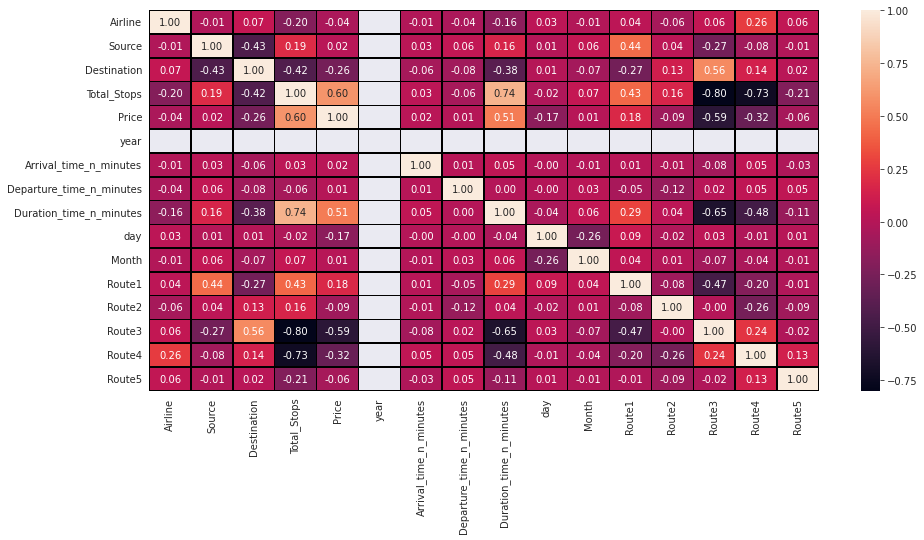

In [84]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

mostly highly positively correlated column is total stops and duration and most highly negatively correlated column is Route 3.source and arrival,departure and month has same correlation with the target column.so check vif

In [85]:
df.drop(['year'], axis = 1, inplace = True)

In [86]:
df.describe()

Airline        Source   Destination   Total_Stops         Price  \
count  10683.000000  10683.000000  10683.000000  10683.000000  10683.000000   
mean       3.965927      1.952261      1.174389      0.824207   9087.064121   
std        2.352155      1.177221      1.012934      0.675199   4611.359167   
min        0.000000      0.000000      0.000000      0.000000   1759.000000   
25%        3.000000      2.000000      0.000000      0.000000   5277.000000   
50%        4.000000      2.000000      1.000000      1.000000   8372.000000   
75%        4.000000      3.000000      2.000000      1.000000  12373.000000   
max       11.000000      4.000000      4.000000      4.000000  79512.000000   

       Arrival_time_n_minutes  Departure_time_n_minutes  \
count            10683.000000              10683.000000   
mean               825.617336                773.852382   
std                409.324620                344.964055   
min                  5.000000                 20.000000   
25%                525.000000                480.000000   
50%                845.000000                710.000000   
75%               1155.000000               1085.000000   
max               1435.000000               1435.000000   

       Duration_time_n_minutes           day         Month       Route1  \
count             10683.000000  10683.000000  10683.000000  10683.00000   
mean                643.093232     12.682205      5.534775      2.01947   
std                 507.862001      8.803701      2.987489      1.20622   
min                   5.000000      3.000000      1.000000      0.00000   
25%                 170.000000      5.000000      3.000000      1.00000   
50%                 520.000000      6.000000      5.000000      2.00000   
75%                 930.000000     21.000000      6.000000      3.00000   
max                2860.000000     27.000000     12.000000      4.00000   

             Route2        Route3        Route4        Route5  
count  10683.000000  10683.000000  10683.000000  10683.000000  
mean      11.897501     13.231489     11.792193      4.983057  
std        8.006192     11.302319      2.948009      0.263901  
min        0.000000      0.000000      0.000000      0.000000  
25%        7.000000      4.000000     13.000000      5.000000  
50%        8.000000      6.000000     13.000000      5.000000  
75%       14.000000     29.000000     13.000000      5.000000  
max       44.000000     29.000000     13.000000      5.000000

skewness present in Price,Arrival_time_n_minutes,Departure_time_n_minutes,Duration_time_n_minutes all these coulmns since max diff between 75% and max.all other columns are Ok

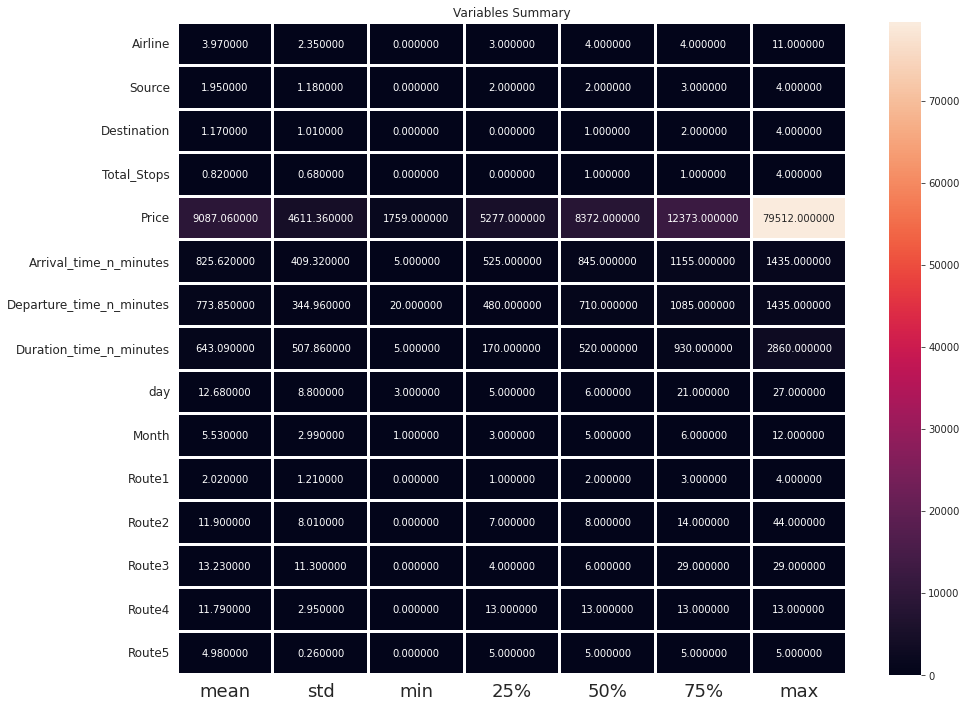

In [87]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

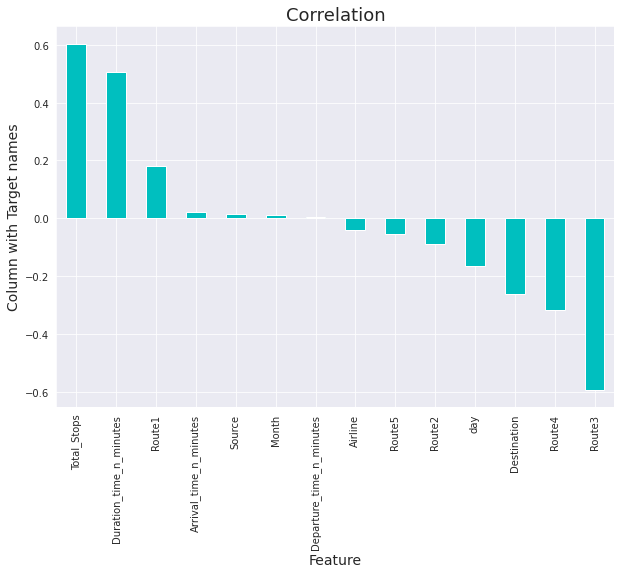

In [88]:
plt.figure(figsize=(10,7))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

displays most correlated and less correlated variable with target as we seen in heatmap

In [89]:
df.shape

(10683, 15)

In [90]:
v=df[list(df.columns)[4]] 
df=df.drop(['Price'],axis=1) 
df

Airline  Source  Destination  Total_Stops  Arrival_time_n_minutes  \
0            3       0            2            0                      70   
1            1       3            0            2                     795   
2            4       2            1            2                     265   
3            3       3            0            1                    1410   
4            3       0            2            1                    1295   
...        ...     ...          ...          ...                     ...   
10678        0       3            0            0                    1345   
10679        1       3            0            0                    1400   
10680        4       0            2            0                     680   
10681       10       0            2            0                     850   
10682        1       2            1            2                    1155   

       Departure_time_n_minutes  Duration_time_n_minutes  day  Month  Route1  \
0                          1340                      170   24      3       0   
1                           350                      445    5      1       2   
2                           565                     1140    6      9       3   
3                          1085                      325    5     12       2   
4                          1010                      285    3      1       0   
...                         ...                      ...  ...    ...     ...   
10678                      1195                      150    4      9       2   
10679                      1245                      155   27      4       2   
10680                       500                      180   27      4       0   
10681                       690                      160    3      1       0   
10682                       655                      500    5      9       3   

       Route2  Route3  Route4  Route5  
0          13      29      13       5  
1          25       1       3       5  
2          32       4       5       5  
3          34       3      13       5  
4          34       8      13       5  
...       ...     ...     ...     ...  
10678       5      29      13       5  
10679       5      29      13       5  
10680      13      29      13       5  
10681      13      29      13       5  
10682      16       4       5       5  

[10683 rows x 14 columns]

In [91]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
df.shape[1]

14

In [93]:
#calculates vif
def calc_vif(df):
    vif=pd.DataFrame()
    vif['Variables']=df.columns
    vif['VIF FACTOR']=[variance_inflation_factor(df.values,i)for i in range(df.shape[1])]
    return(vif)


calc_vif(df)

Variables  VIF FACTOR
0                    Airline    4.201812
1                     Source    5.643706
2                Destination    4.224835
3                Total_Stops   19.244817
4     Arrival_time_n_minutes    5.144822
5   Departure_time_n_minutes    6.229800
6    Duration_time_n_minutes    6.010172
7                        day    3.365554
8                      Month    4.794759
9                     Route1    6.305142
10                    Route2    3.774663
11                    Route3   10.750860
12                    Route4   49.417263
13                    Route5  127.453252

In [94]:
df.shape

(10683, 14)

In [95]:
df.insert(14,'Price',v) 
df

Airline  Source  Destination  Total_Stops  Arrival_time_n_minutes  \
0            3       0            2            0                      70   
1            1       3            0            2                     795   
2            4       2            1            2                     265   
3            3       3            0            1                    1410   
4            3       0            2            1                    1295   
...        ...     ...          ...          ...                     ...   
10678        0       3            0            0                    1345   
10679        1       3            0            0                    1400   
10680        4       0            2            0                     680   
10681       10       0            2            0                     850   
10682        1       2            1            2                    1155   

       Departure_time_n_minutes  Duration_time_n_minutes  day  Month  Route1  \
0                          1340                      170   24      3       0   
1                           350                      445    5      1       2   
2                           565                     1140    6      9       3   
3                          1085                      325    5     12       2   
4                          1010                      285    3      1       0   
...                         ...                      ...  ...    ...     ...   
10678                      1195                      150    4      9       2   
10679                      1245                      155   27      4       2   
10680                       500                      180   27      4       0   
10681                       690                      160    3      1       0   
10682                       655                      500    5      9       3   

       Route2  Route3  Route4  Route5  Price  
0          13      29      13       5   3897  
1          25       1       3       5   7662  
2          32       4       5       5  13882  
3          34       3      13       5   6218  
4          34       8      13       5  13302  
...       ...     ...     ...     ...    ...  
10678       5      29      13       5   4107  
10679       5      29      13       5   4145  
10680      13      29      13       5   7229  
10681      13      29      13       5  12648  
10682      16       4       5       5  11753  

[10683 rows x 15 columns]

In [96]:
df.shape[1]

15

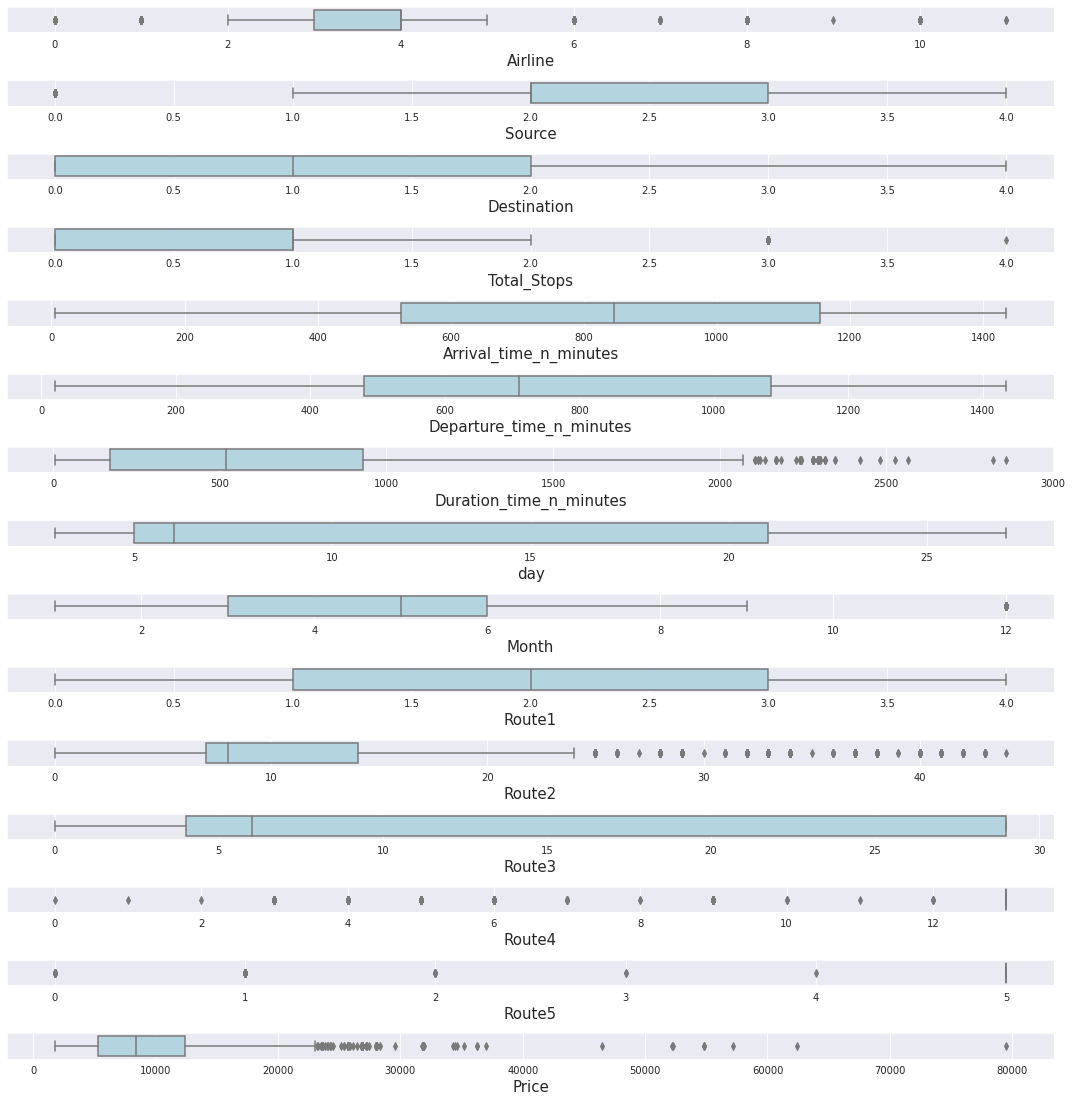

In [97]:
plt.figure(figsize= (15,20))
pltnum = 1
for i in df:
    if pltnum <=20:
        plt.subplot(20,1,pltnum)
        sns.boxplot(df[i],color = 'lightblue')
        plt.xlabel(i,fontsize=15)
    pltnum+=1
plt.tight_layout()

most outliers are present in departure route 1 and route 3

In [98]:
#ckeck skewness
df.skew()

Airline                      0.731095
Source                      -0.424054
Destination                  0.846715
Total_Stops                  0.317049
Arrival_time_n_minutes      -0.371280
Departure_time_n_minutes     0.125184
Duration_time_n_minutes      0.861074
day                          0.367373
Month                        0.629540
Route1                      -0.618662
Route2                       1.424628
Route3                       0.621716
Route4                      -2.082590
Route5                     -16.012886
Price                        1.812552
dtype: float64

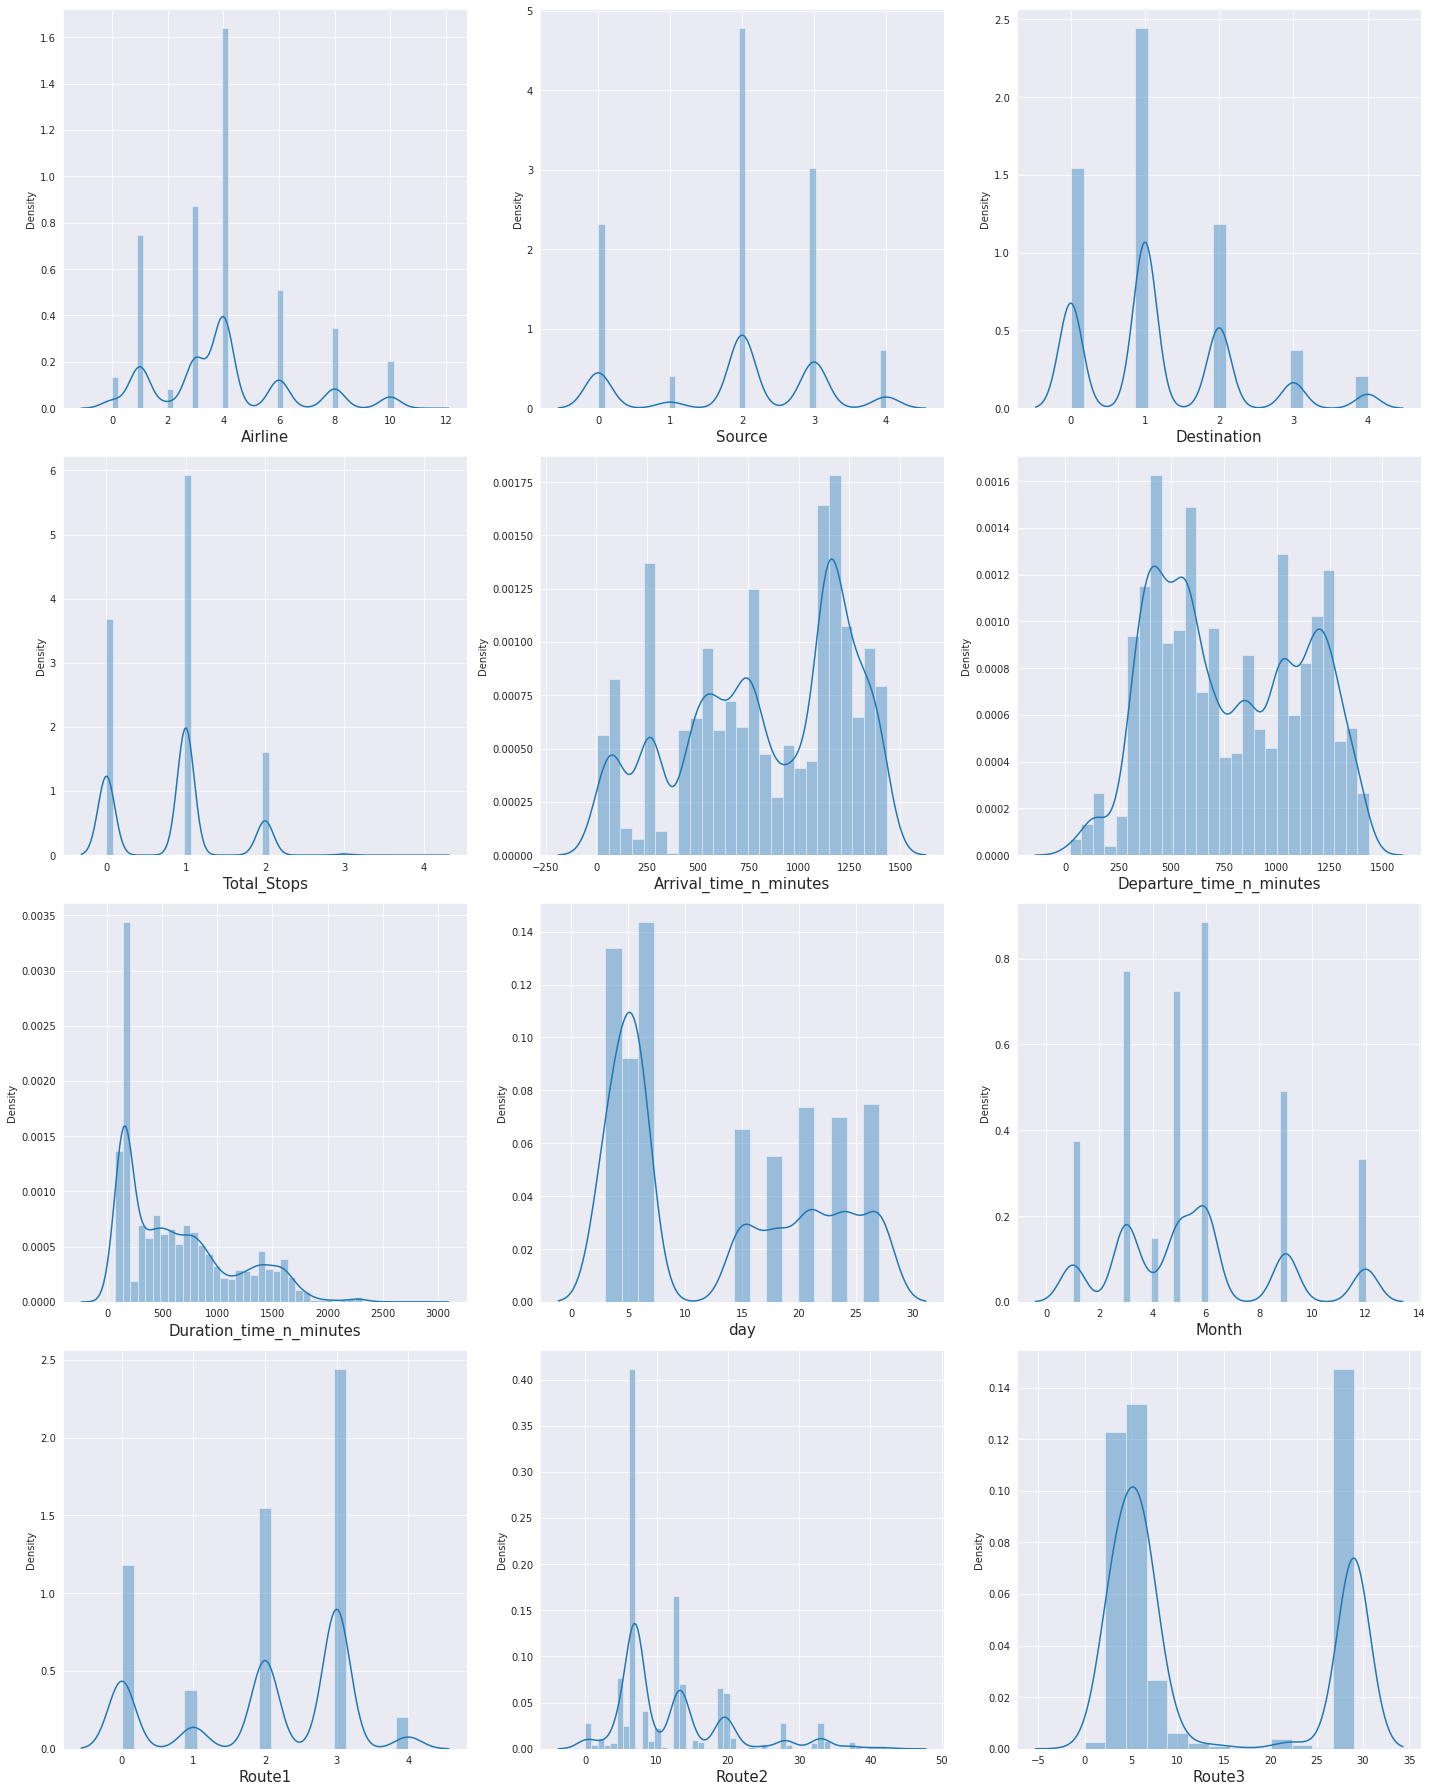

In [99]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for col in df:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

#checking Z-score to remove outliers

In [100]:

import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape


(10683, 15)

In [101]:
threshold=3
print(np.where(z>3))

(array([   16,   123,   164,   185,   191,   226,   249,   291,   365,
         396,   402,   402,   402,   458,   470,   482,   486,   510,
         553,   596,   597,   628,   657,   673,   720,   785,   826,
         853,   877,   919,   919,   936,   946,   959,   961,   966,
         969,   972,   975,  1010,  1014,  1067,  1113,  1138,  1196,
        1203,  1211,  1218,  1218,  1218,  1246,  1327,  1339,  1341,
        1346,  1386,  1424,  1442,  1462,  1466,  1478,  1496,  1551,
        1558,  1591,  1596,  1628,  1629,  1654,  1657,  1665,  1665,
        1785,  1791,  1798,  1804,  1918,  1949,  1966,  2055,  2099,
        2108,  2151,  2172,  2172,  2172,  2172,  2185,  2205,  2360,
        2495,  2497,  2533,  2543,  2553,  2556,  2618,  2623,  2623,
        2633,  2633,  2635,  2641,  2654,  2670,  2693,  2697,  2718,
        2718,  2718,  2718,  2814,  2814,  2822,  2822,  2924,  3032,
        3082,  3104,  3111,  3157,  3157,  3183,  3220,  3220,  3234,
        3257,  3304

In [102]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(10683, 15)
(10348, 15)


some outliers got removed

In [103]:
#finds data loss
loss_percent=(10683-10348)/(10683*100)
print(loss_percent)

0.0003135823270616868


data loss percentage is very low.data is cleaned also

In [104]:
df_new


Airline  Source  Destination  Total_Stops  Arrival_time_n_minutes  \
0            3       0            2            0                      70   
1            1       3            0            2                     795   
2            4       2            1            2                     265   
3            3       3            0            1                    1410   
4            3       0            2            1                    1295   
...        ...     ...          ...          ...                     ...   
10678        0       3            0            0                    1345   
10679        1       3            0            0                    1400   
10680        4       0            2            0                     680   
10681       10       0            2            0                     850   
10682        1       2            1            2                    1155   

       Departure_time_n_minutes  Duration_time_n_minutes  day  Month  Route1  \
0                          1340                      170   24      3       0   
1                           350                      445    5      1       2   
2                           565                     1140    6      9       3   
3                          1085                      325    5     12       2   
4                          1010                      285    3      1       0   
...                         ...                      ...  ...    ...     ...   
10678                      1195                      150    4      9       2   
10679                      1245                      155   27      4       2   
10680                       500                      180   27      4       0   
10681                       690                      160    3      1       0   
10682                       655                      500    5      9       3   

       Route2  Route3  Route4  Route5  Price  
0          13      29      13       5   3897  
1          25       1       3       5   7662  
2          32       4       5       5  13882  
3          34       3      13       5   6218  
4          34       8      13       5  13302  
...       ...     ...     ...     ...    ...  
10678       5      29      13       5   4107  
10679       5      29      13       5   4145  
10680      13      29      13       5   7229  
10681      13      29      13       5  12648  
10682      16       4       5       5  11753  

[10348 rows x 15 columns]

In [105]:
df_new.shape

(10348, 15)

In [106]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(df_new,method='yeo-johnson',standardize=False)
df_new

array([[1.93776428e+00, 0.00000000e+00, 1.15043011e+00, ...,
        1.50709881e+08, 1.48340233e+03, 5.69589184e+01],
       [8.16071035e-01, 3.72380960e+00, 0.00000000e+00, ...,
        7.40198666e+03, 1.48340233e+03, 7.42189716e+01],
       [2.38168246e+00, 2.35777293e+00, 7.13540718e-01, ...,
        1.83621192e+05, 1.48340233e+03, 9.34764997e+01],
       ...,
       [2.38168246e+00, 0.00000000e+00, 1.15043011e+00, ...,
        1.50709881e+08, 1.48340233e+03, 7.25552008e+01],
       [4.36997840e+00, 0.00000000e+00, 1.15043011e+00, ...,
        1.50709881e+08, 1.48340233e+03, 9.01684846e+01],
       [8.16071035e-01, 2.35777293e+00, 7.13540718e-01, ...,
        1.83621192e+05, 1.48340233e+03, 8.76410660e+01]])

In [107]:
df_for_model = pd.DataFrame(df_new) 

In [108]:
#seggregate input data and output data
x=df_for_model.iloc[:,:-1]
y=df_for_model.iloc[:,-1]

In [109]:
#scaling to get better model performance
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
x= mmscaler.fit_transform(x)
x

array([[0.41791194, 0.        , 0.66797513, ..., 1.        , 1.        ,
        0.        ],
       [0.17599965, 0.71907522, 0.        , ..., 0.28031985, 0.        ,
        0.        ],
       [0.51365047, 0.45529076, 0.4143037 , ..., 0.58170273, 0.00116932,
        0.        ],
       ...,
       [0.51365047, 0.        , 0.66797513, ..., 1.        , 1.        ,
        0.        ],
       [0.94246042, 0.        , 0.66797513, ..., 1.        , 1.        ,
        0.        ],
       [0.17599965, 0.45529076, 0.4143037 , ..., 0.58170273, 0.00116932,
        0.        ]])

MAKE TEST DATA READY

do same procedure s=as we did for training data

In [215]:
#stroing into csv file

test_x= pd.read_excel(r"/content/Test_set.xlsx")
test_y= pd.read_excel(r"/content/Sample_submission.xlsx")


In [216]:
pd.set_option('display.max_columns', None)

In [217]:
test_x

Airline Date_of_Journey    Source Destination  \
0           Jet Airways       6/06/2019     Delhi      Cochin   
1                IndiGo      12/05/2019   Kolkata    Banglore   
2           Jet Airways      21/05/2019     Delhi      Cochin   
3     Multiple carriers      21/05/2019     Delhi      Cochin   
4              Air Asia      24/06/2019  Banglore       Delhi   
...                 ...             ...       ...         ...   
2666          Air India       6/06/2019   Kolkata    Banglore   
2667             IndiGo      27/03/2019   Kolkata    Banglore   
2668        Jet Airways       6/03/2019     Delhi      Cochin   
2669          Air India       6/03/2019     Delhi      Cochin   
2670  Multiple carriers      15/06/2019     Delhi      Cochin   

                Route Dep_Time  Arrival_Time Duration Total_Stops  \
0     DEL → BOM → COK    17:30  04:25 07 Jun  10h 55m      1 stop   
1     CCU → MAA → BLR    06:20         10:20       4h      1 stop   
2     DEL → BOM → COK    19:15  19:00 22 May  23h 45m      1 stop   
3     DEL → BOM → COK    08:00         21:00      13h      1 stop   
4           BLR → DEL    23:55  02:45 25 Jun   2h 50m    non-stop   
...               ...      ...           ...      ...         ...   
2666  CCU → DEL → BLR    20:30  20:25 07 Jun  23h 55m      1 stop   
2667        CCU → BLR    14:20         16:55   2h 35m    non-stop   
2668  DEL → BOM → COK    21:50  04:25 07 Mar   6h 35m      1 stop   
2669  DEL → BOM → COK    04:00         19:15  15h 15m      1 stop   
2670  DEL → BOM → COK    04:55         19:15  14h 20m      1 stop   

                  Additional_Info  
0                         No info  
1                         No info  
2     In-flight meal not included  
3                         No info  
4                         No info  
...                           ...  
2666                      No info  
2667                      No info  
2668                      No info  
2669                      No info  
2670                      No info  

[2671 rows x 10 columns]

In [218]:
test_x.drop('Additional_Info',inplace=True,axis=1)

In [219]:
# replace empty values of the columns by mean,most frequent values
import numpy as np
from sklearn.impute import SimpleImputer
for col in ['Total_Stops','Route']:
    imp=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")
    test_x[col]=imp.fit_transform(test_x[col].values.reshape(-1,1))

In [220]:
#As we can see that there are two 'Delhi' values in column we combine them
test_x['Destination']=test_x['Destination'].str.replace('New Delhi','Delhi')

In [221]:
import calendar
  
test_x['year'] = pd.DatetimeIndex(test_x['Date_of_Journey']).year

In [222]:
test_x['Arrival_Time']=test_x['Arrival_Time'].str.split(' ').str[0]

In [223]:
arrival_time=test_x['Arrival_Time']
test_x['Arrival_hour']=pd.to_datetime(arrival_time).dt.hour
test_x['Arrival_minute']=pd.to_datetime(arrival_time).dt.minute

In [224]:
test_x.drop('Arrival_Time',axis=1,inplace=True)

In [225]:
Depart_time=test_x['Dep_Time']
test_x['Departure_hour']=pd.to_datetime(Depart_time).dt.hour
test_x['Departure_minute']=pd.to_datetime(Depart_time).dt.minute

In [226]:
test_x.drop('Dep_Time',axis=1,inplace=True)

In [227]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time
# Assigning and converting Duration column into list
duration = list(test_x["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [228]:
# Adding duration_hours and duration_mins list to train_data dataframe
test_x["Duration_hours"] = duration_hours
test_x["Duration_mins"] = duration_mins

In [229]:
test_x.drop(["Duration"], axis = 1, inplace = True)

In [230]:
test_x['Arrival_hour'] = test_x['Arrival_hour'] * 60

In [231]:
test_x['Arrival_time_n_minutes']=test_x['Arrival_hour']+test_x['Arrival_minute']

In [232]:
test_x.drop(['Arrival_hour','Arrival_minute'], axis = 1, inplace = True)

In [233]:
test_x['Departure_hour'] = test_x['Departure_hour'] * 60

In [234]:
test_x['Departure_time_n_minutes']=test_x['Departure_hour']+test_x['Departure_minute']

In [235]:
test_x.drop(['Departure_hour','Departure_minute'], axis = 1, inplace = True)

In [236]:
test_x['Duration_hours'] = test_x['Duration_hours'] * 60

In [237]:
test_x['Duration_time_n_minutes']=test_x['Duration_hours']+test_x['Duration_mins']

In [238]:
test_x.drop(['Duration_hours','Duration_mins'], axis = 1, inplace = True)

In [239]:
# separate journey day and month from journey_date
test_x['day'] = pd.to_datetime(test_x.Date_of_Journey, format='%d/%m/%Y').dt.day
test_x['Month'] = pd.to_datetime(test_x.Date_of_Journey, format='%d/%m/%Y').dt.month

In [240]:
# replace the values of total steps
test_x.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [241]:
test_x['Route1']=test_x['Route'].str.split('→').str[0]
test_x['Route2']=test_x['Route'].str.split('→').str[1]
test_x['Route3']=test_x['Route'].str.split('→').str[2]
test_x['Route4']=test_x['Route'].str.split('→').str[3]
test_x['Route5']=test_x['Route'].str.split('→').str[4]

In [242]:
test_x.drop(["Route"], axis = 1, inplace = True)

In [243]:
for i in ['Route3', 'Route4', 'Route5']:
    test_x[i].fillna('None',inplace=True)

In [244]:
test_x.drop(['Date_of_Journey'], axis = 1, inplace = True)

In [245]:
#converting string data type to int type using LabelEncoding
le=LabelEncoder()

list1=['Airline', 'Source', 'Destination','Route1', 'Route2', 'Route3','Route4', 'Route5']
for val in list1:
    test_x[val]=le.fit_transform(test_x[val].astype(str))
test_x

Airline  Source  Destination  Total_Stops  year  Arrival_time_n_minutes  \
0           4       2            1            1  2019                     265   
1           3       3            0            1  2019                     620   
2           4       2            1            1  2019                    1140   
3           6       2            1            1  2019                    1260   
4           0       0            2            0  2019                     165   
...       ...     ...          ...          ...   ...                     ...   
2666        1       3            0            1  2019                    1225   
2667        3       3            0            0  2019                    1015   
2668        4       2            1            1  2019                     265   
2669        1       2            1            1  2019                    1155   
2670        6       2            1            1  2019                    1155   

      Departure_time_n_minutes  Duration_time_n_minutes  day  Month  Route1  \
0                         1050                      655    6      6       3   
1                          380                      240   12      5       2   
2                         1155                     1425   21      5       3   
3                          480                      780   21      5       3   
4                         1435                      170   24      6       0   
...                        ...                      ...  ...    ...     ...   
2666                      1230                     1435    6      6       2   
2667                       860                      155   27      3       2   
2668                      1310                      395    6      3       3   
2669                       240                      915    6      3       3   
2670                       295                      860   15      6       3   

      Route2  Route3  Route4  Route5  
0          7       5       9       4  
1         29       3       9       4  
2          7       5       9       4  
3          7       5       9       4  
4         13      27       9       4  
...      ...     ...     ...     ...  
2666      14       3       9       4  
2667       5      27       9       4  
2668       7       5       9       4  
2669       7       5       9       4  
2670       7       5       9       4  

[2671 rows x 15 columns]

In [246]:
test_x.drop(['year'], axis = 1, inplace = True)

In [247]:
test_y

Price
0     15998
1     16612
2     25572
3     25778
4     16934
...     ...
2666  14046
2667  14086
2668  22720
2669  23544
2670  27489

[2671 rows x 1 columns]

In [248]:
df2 = pd.concat([test_x, test_y], axis=1, join='inner')

In [249]:
df2.shape

(2671, 15)

In [250]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df2))
z.shape

(2671, 15)

In [251]:
threshold=3
print(np.where(z>3))

(array([   6,   50,   72,   72,   77,   99,  113,  120,  136,  177,  196,
        211,  230,  246,  251,  251,  251,  251,  260,  271,  281,  297,
        312,  312,  338,  339,  341,  344,  344,  367,  424,  461,  463,
        474,  484,  484,  491,  505,  510,  554,  563,  579,  635,  642,
        655,  664,  666,  673,  673,  673,  679,  680,  700,  724,  725,
        725,  725,  735,  748,  750,  786,  819,  822,  830,  833,  862,
        870,  875,  875,  877,  877,  888,  966,  974,  987,  999, 1022,
       1085, 1088, 1101, 1108, 1110, 1130, 1175, 1185, 1246, 1251, 1262,
       1271, 1279, 1312, 1328, 1335, 1379, 1381, 1400, 1437, 1457, 1479,
       1483, 1490, 1501, 1508, 1511, 1536, 1554, 1555, 1622, 1682, 1686,
       1689, 1689, 1689, 1689, 1744, 1756, 1756, 1781, 1805, 1825, 1838,
       1861, 1876, 1888, 1889, 1891, 1918, 1921, 1923, 1943, 1945, 1957,
       1973, 1975, 1985, 1987, 1988, 2001, 2002, 2021, 2021, 2026, 2077,
       2090, 2114, 2226, 2231, 2251, 2293, 2308, 2

In [252]:
df_new1=df2[(z<3).all(axis=1)]
print(df2.shape)
print(df_new1.shape)

(2671, 15)
(2516, 15)


some outliers got removed

In [253]:
#finds data loss
loss_percent=(2671-2516)/(2671*100)
print(loss_percent)

0.0005803070011231749


data loss is very less 

In [254]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
df_new1=power_transform(df_new1,method='yeo-johnson',standardize=False)
df_new1

array([[2.71178963e+00, 2.24416554e+00, 7.39088958e-01, ...,
        1.69219404e+07, 5.63327446e+01, 4.20111879e+01],
       [2.16294145e+00, 3.48951556e+00, 0.00000000e+00, ...,
        1.69219404e+07, 5.63327446e+01, 4.24523661e+01],
       [2.71178963e+00, 2.24416554e+00, 7.39088958e-01, ...,
        1.69219404e+07, 5.63327446e+01, 4.78180895e+01],
       ...,
       [2.71178963e+00, 2.24416554e+00, 7.39088958e-01, ...,
        1.69219404e+07, 5.63327446e+01, 4.62882749e+01],
       [8.59642268e-01, 2.24416554e+00, 7.39088958e-01, ...,
        1.69219404e+07, 5.63327446e+01, 4.67443339e+01],
       [3.69169858e+00, 2.24416554e+00, 7.39088958e-01, ...,
        1.69219404e+07, 5.63327446e+01, 4.87761288e+01]])

In [255]:
df_for_model1 = pd.DataFrame(df_new1) 

In [256]:
#seggregate input data and output data
test_input=df_for_model1.iloc[:,:-1]
test_target=df_for_model1.iloc[:,-1]

In [257]:
#scaling to get better model performance
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
test_input= mmscaler.fit_transform(test_input)
test_input

array([[0.50576117, 0.46838433, 0.39483217, ..., 0.71691518, 1.        ,
        0.        ],
       [0.40339848, 0.72830385, 0.        , ..., 0.60231907, 1.        ,
        0.        ],
       [0.50576117, 0.46838433, 0.39483217, ..., 0.71691518, 1.        ,
        0.        ],
       ...,
       [0.50576117, 0.46838433, 0.39483217, ..., 0.71691518, 1.        ,
        0.        ],
       [0.16032722, 0.46838433, 0.39483217, ..., 0.71691518, 1.        ,
        0.        ],
       [0.68851867, 0.46838433, 0.39483217, ..., 0.71691518, 1.        ,
        0.        ]])

MODEL EVALUATION

REGRESSION :

Linear Regression

In [153]:
#Linear Regression
#model fitting
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split



In [154]:
#getting best accuracy with help of selecting random state
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:{r2_score(y_train,pred_train)*100}")
    print(f"At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)*100}")
    print("\n")
    
    
    
    

At random state 0,the training accuracy is:61.17643941689752
At random state 0,the testing accuracy is:60.481476851767916


At random state 1,the training accuracy is:60.500576383630865
At random state 1,the testing accuracy is:63.10536775776201


At random state 2,the training accuracy is:61.47718105600829
At random state 2,the testing accuracy is:59.23454876498806


At random state 3,the training accuracy is:61.28083889498941
At random state 3,the testing accuracy is:60.05490872268587


At random state 4,the training accuracy is:60.97412986756985
At random state 4,the testing accuracy is:61.22985213608065


At random state 5,the training accuracy is:60.584778742449785
At random state 5,the testing accuracy is:62.783587134074196


At random state 6,the training accuracy is:61.251986195477336
At random state 6,the testing accuracy is:60.03559014753602


At random state 7,the training accuracy is:61.02855330881503
At random state 7,the testing accuracy is:60.93249569929719


At random s

In [155]:
#evaluation metrics

print("Accuracy:", r2_score(y_test,pred_test)*100)

Accuracy: 61.309614233260135


In [156]:
#cross validation at random state
Train_accuracy=(r2_score(y_train,pred_train)*100)
Test_accuracy=r2_score(y_test,pred_test)*100
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x_test,y_test,cv=j)
    cv_mean=cv_score.mean()*100
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for Training is {Train_accuracy} and accuracy score for Testing is {Test_accuracy}")
    print("\n")
    

At cross fold 2 the cv score is 60.045098415875174 and accuracy score for Training is 60.96795898079696 and accuracy score for Testing is 61.309614233260135


At cross fold 3 the cv score is 60.82895630463597 and accuracy score for Training is 60.96795898079696 and accuracy score for Testing is 61.309614233260135


At cross fold 4 the cv score is 60.74893860023798 and accuracy score for Training is 60.96795898079696 and accuracy score for Testing is 61.309614233260135


At cross fold 5 the cv score is 60.9541356279536 and accuracy score for Training is 60.96795898079696 and accuracy score for Testing is 61.309614233260135


At cross fold 6 the cv score is 60.84807063932095 and accuracy score for Training is 60.96795898079696 and accuracy score for Testing is 61.309614233260135


At cross fold 7 the cv score is 60.85469131090445 and accuracy score for Training is 60.96795898079696 and accuracy score for Testing is 61.309614233260135


At cross fold 8 the cv score is 60.8175308930224 and

parameter tuning

In [157]:
#perform gridsearchcv and cross val score on LinearRegression
from sklearn.model_selection import GridSearchCV

parameters={'fit_intercept':[True,False], 'normalize':[True,False], 'n_jobs':[None,1,-1]}
lr=LinearRegression()
clf=GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'fit_intercept': True, 'n_jobs': None, 'normalize': True}


In [158]:
lr=LinearRegression( fit_intercept= True, n_jobs= None, normalize= True)
lr.fit(x_train,y_train)
pred_test_lr=lr.predict(x_test)
pred_train_lr=lr.predict(x_train)
lr_score = lr.score(x_train,y_train)
lr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",lr_acc_score*100)
print("score of model is:",lr_score*100)

Accuracy score is: 61.309614233260135
score of model is: 60.967958980796965


In [159]:
cv_score_lr=cross_val_score(lr,x_test,y_test,cv=5)
cv_mean_lr=cv_score_lr.mean()
print("cv_mean is:",cv_mean_lr*100)

cv_mean is: 60.9541356279536


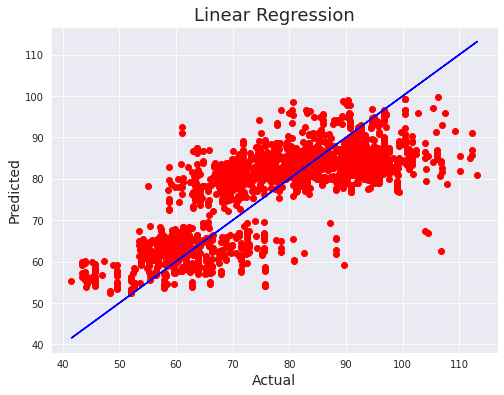

In [160]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [161]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test))
print("mean squared error",mean_squared_error(y_test,pred_test))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test)))
print("r2_score is",r2_score(y_test,pred_test)*100)

mean absolute error 7.301935884828172
mean squared error 81.93508024055028
Root mean squared error 9.051799834317498
r2_score is 61.309614233260135


LASSO REGRESSION

parameter tuning

In [163]:
#perform gridsearchcv and cross val score on lasso regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10)),'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 0.0001, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.001}


In [164]:
ls=Lasso(alpha=1,random_state=0,fit_intercept= True, normalize= False,tol= 0.001)
ls.fit(x_train,y_train)
pred_test_ls=ls.predict(x_test)
pred_train_ls=ls.predict(x_train)
ls_score = ls.score(x_train,y_train)
ls_acc_score=r2_score(y_test,pred_test_ls)
print("Accuracy score is:",ls_acc_score*100)


Accuracy score is: 47.889891010074834


In [165]:
#checks cv score
for u in range(2,10):
    cv_score_ls=cross_val_score(ls,x,y,cv=5)
    cv_mean_ls=cv_score_ls.mean()
    print("At cv :-",j )
    print("cv_score is:",cv_mean_ls*100)
    print("accuracy score---r2_score is",ls_acc_score*100)

At cv :- 9
cv_score is: 47.7231493191686
accuracy score---r2_score is 47.889891010074834
At cv :- 9
cv_score is: 47.7231493191686
accuracy score---r2_score is 47.889891010074834
At cv :- 9
cv_score is: 47.7231493191686
accuracy score---r2_score is 47.889891010074834
At cv :- 9
cv_score is: 47.7231493191686
accuracy score---r2_score is 47.889891010074834
At cv :- 9
cv_score is: 47.7231493191686
accuracy score---r2_score is 47.889891010074834
At cv :- 9
cv_score is: 47.7231493191686
accuracy score---r2_score is 47.889891010074834
At cv :- 9
cv_score is: 47.7231493191686
accuracy score---r2_score is 47.889891010074834
At cv :- 9
cv_score is: 47.7231493191686
accuracy score---r2_score is 47.889891010074834


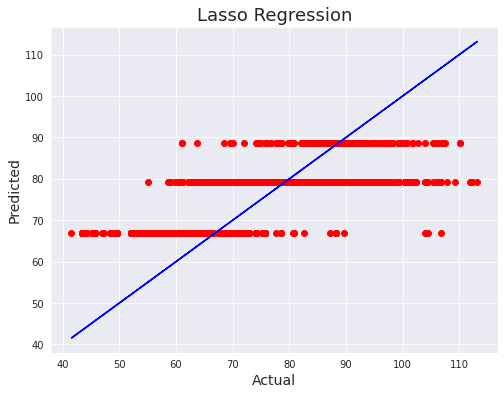

In [166]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

In [168]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_ls))
print("mean squared error",mean_squared_error(y_test,pred_test_ls))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_ls)))
print("r2_score is",r2_score(y_test,pred_test_ls)*100)

mean absolute error 8.618541158025327
mean squared error 110.35418429721975
Root mean squared error 10.504959985512546
r2_score is 47.889891010074834


RANDOM FOREST REGRESSION

parameter tuning

In [170]:
#perform gridsearchcv and cross val score on RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['squared_error', 'mse','absolute_error'],'max_features':["auto","sqrt"],'bootstrap': [True, False],'min_samples_split':[1,2],'min_samples_leaf':[1,2]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

                                                      


{'bootstrap': True, 'criterion': 'mse', 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2}


In [171]:
rf=RandomForestRegressor(criterion="mae",max_features="log2",bootstrap= True,min_samples_leaf= 2, min_samples_split= 2)
rf.fit(x_train,y_train)
pred_test_rf=rf.predict(x_test)
pred_train_rf=rf.predict(x_train)
rf_score = rf.score(x_train,y_train)
rf_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",rf_acc_score*100)
print("score of model is:",rf_score*100)

Accuracy score is: 61.309614233260135
score of model is: 91.51264811943972


In [172]:
cv_score_rf=cross_val_score(rf,x,y,cv=5)
cv_mean_rf=cv_score_rf.mean()
print("cv_mean is:",cv_mean_rf*100)

cv_mean is: 85.92261242443925


In [173]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_rf))
print("mean squared error",mean_squared_error(y_test,pred_test_rf))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print("r2_score is",r2_score(y_test,pred_test_rf)*100)

mean absolute error 3.7377991342307384
mean squared error 27.879785154317116
Root mean squared error 5.280131168287121
r2_score is 86.83494738093258


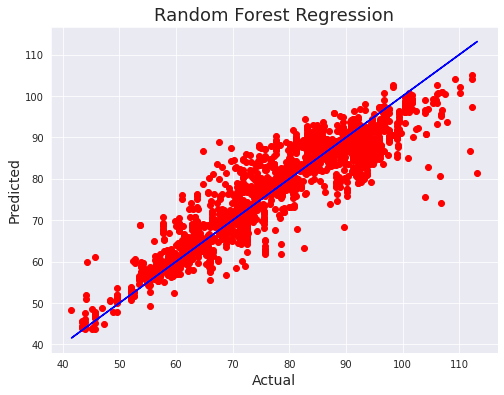

In [174]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_rf,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Random Forest Regression',fontsize=18)
plt.show()

RIDGE REGRESSION

In [175]:
#perform gridsearchcv and cross val score on Ridge Regressor
from sklearn.linear_model import Ridge
parameters={'alpha':[0.0001,0.001,0.01,0.1,1],'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001],'random_state':list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 1, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.001}


In [176]:
rd=Ridge(alpha=0.001,fit_intercept=True,normalize=True,random_state=0,tol=0.001)
rd.fit(x_train,y_train)
pred_test_rd=rd.predict(x_test)
pred_train_rd=rd.predict(x_train)
rd_score = rd.score(x_train,y_train)
rd_acc_score=r2_score(y_test,pred_test_rd)
print("Accuracy score is:",rd_acc_score*100)
print("score of model is:",rd_score*100)

Accuracy score is: 61.3067473046385
score of model is: 60.96772997906253


In [177]:
cv_score_rd=cross_val_score(rd,x,y,cv=5)
cv_mean_rd=cv_score_rd.mean()
print("cv_mean is:",cv_mean_rd*100)

cv_mean is: 60.867895077673516


In [178]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_rd))
print("mean squared error",mean_squared_error(y_test,pred_test_rd))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_rd)))
print("r2_score is",r2_score(y_test,pred_test_rd)*100)

mean absolute error 7.302014921023588
mean squared error 81.94115156865941
Root mean squared error 9.052135193900908
r2_score is 61.3067473046385


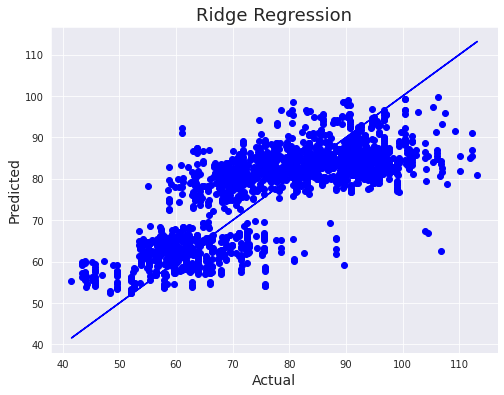

In [179]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_rd,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

DECISION TREE REGRESSOR

In [180]:
#perform gridsearchcv and cross val score on Decison Tree Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mae','poisson'],'splitter':['best','random'],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,10)),'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

                  

{'criterion': 'mse', 'max_features': 'auto', 'min_weight_fraction_leaf': 0.1, 'random_state': 1, 'splitter': 'best'}


In [181]:
dt=DecisionTreeRegressor(criterion='mse',max_features= 'auto', min_weight_fraction_leaf= 0.1, random_state= 1, splitter= 'random')
dt.fit(x_train,y_train)
pred_test_dt=dt.predict(x_test)
pred_train_dt=dt.predict(x_train)
dt_score = dt.score(x_train,y_train)
dt_acc_score=r2_score(y_test,pred_test_dt)
print("Accuracy score is:",dt_acc_score*100)
print("score of model is:",dt_score*100)


Accuracy score is: 53.02479099782496
score of model is: 53.70122923168881


In [182]:
cv_score_dt=cross_val_score(dt,x,y,cv=5)
cv_mean_dt=cv_score_dt.mean()
print("cv_mean is:",cv_mean_dt*100)

cv_mean is: 53.11179555864154


In [183]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_dt))
print("mean squared error",mean_squared_error(y_test,pred_test_dt))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_dt)))
print("r2_score is",r2_score(y_test,pred_test_dt)*100)

mean absolute error 7.9242427129484305
mean squared error 99.47994683006104
Root mean squared error 9.973963446396876
r2_score is 53.02479099782496


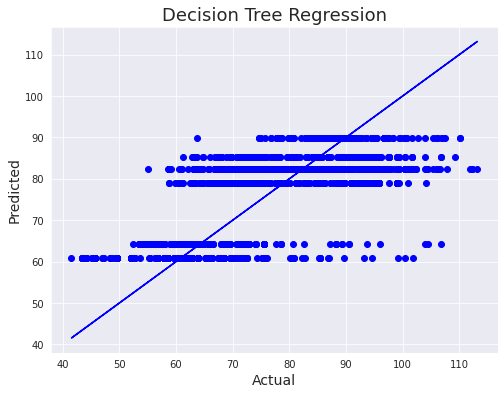

In [184]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_dt,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

GRADIENT BOOSTING REGRESSOR

In [192]:
#perform gridsearchcv and cross val score on  GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','squared_error','absolute_error'],'n_estimators':[50,100],'criterion':['friedman_mse','mse'],'learning_rate':[0.05],'max_depth' : [1,3,4],'min_weight_fraction_leaf':[0.1,0.2,0.3]}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)



{'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'ls', 'max_depth': 4, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 100}


In [193]:

gbr=GradientBoostingRegressor(criterion='friedman_mse',loss='ls',n_estimators=100,learning_rate= 0.05,max_depth= 4, min_weight_fraction_leaf= 0.1)
gbr.fit(x_train,y_train)
pred_test_gbr=gbr.predict(x_test)
pred_train_gbr=gbr.predict(x_train)
gbr_score = gbr.score(x_train,y_train)
gbr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",gbr_acc_score*100)
print("score of model is:",gbr_score*100)

Accuracy score is: 61.309614233260135
score of model is: 76.50967906472361


In [194]:
cv_score_gbr=cross_val_score(gbr,x,y,cv=5)
cv_mean_gbr=cv_score_gbr.mean()
print("cv_mean is:",cv_mean_gbr*100)

cv_mean is: 76.36726679807951


In [195]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_gbr))
print("mean squared error",mean_squared_error(y_test,pred_test_gbr))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_gbr)))
print("r2_score is",r2_score(y_test,pred_test_gbr)*100)

mean absolute error 5.358181209574961
mean squared error 48.77548439608861
Root mean squared error 6.983944758951678
r2_score is 76.96783475766577


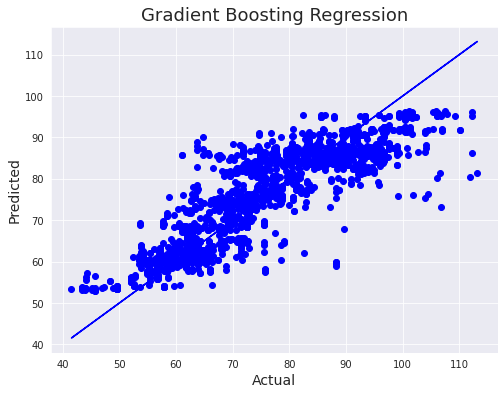

In [196]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_gbr,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Gradient Boosting Regression',fontsize=18)
plt.show()

SUPPORT VECTOR REGRESSOR

In [198]:
#perform gridsearchcv and cross val score on Support Vector Regressor
from sklearn.svm import SVR
parameters ={'kernel':['linear','rbf'],'gamma':['scale', 'auto'],'tol':[0.01,0.001],'shrinking':[True,False],'degree':[3,4],'max_iter':[1,-1]}
sv=SVR()
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'degree': 4, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'shrinking': True, 'tol': 0.0001}


In [199]:
sv=SVR(kernel='poly',gamma='scale',degree= 5, max_iter= -1, shrinking= False, tol= 0.0001)
sv.fit(x_train,y_train)
pred_test_sv=sv.predict(x_test)
pred_train_sv=sv.predict(x_train)
sv_score = sv.score(x_train,y_train)
sv_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",sv_acc_score*100)
print("score of model is:",sv_score*100)

Accuracy score is: 61.309614233260135
score of model is: 77.90732478424499


In [200]:
cv_score_sv=cross_val_score(sv,x,y,cv=5)
cv_mean_sv=cv_score_sv.mean()
print("cv_mean is:",cv_mean_sv*100)

cv_mean is: 76.02427804013756


In [201]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_sv))
print("mean squared error",mean_squared_error(y_test,pred_test_sv))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_sv)))
print("r2_score is",r2_score(y_test,pred_test_sv)*100)

mean absolute error 5.1507249520201155
mean squared error 49.637408570918616
Root mean squared error 7.0453820741616715
r2_score is 76.56082742054049


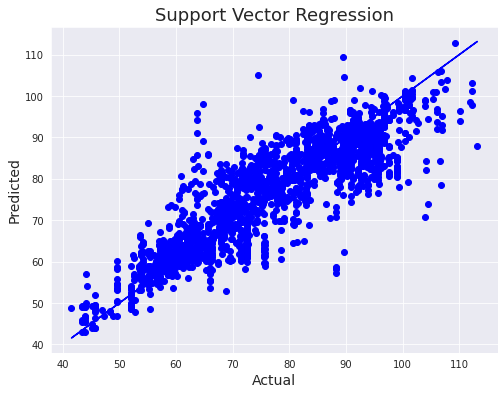

In [202]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_sv,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Support Vector Regression',fontsize=18)
plt.show()

ELASTIC NET REGRESSION(COMBINATION OF L1 AND L2)

In [203]:
from sklearn.linear_model import ElasticNet
parameters={'alpha':[0.0001,0.001,0.01,0.1,1],'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001],'random_state':list(range(0,10))}
enr=ElasticNet()
clf=GridSearchCV(enr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.001}


In [204]:
enr=ElasticNet(alpha=0.0001,fit_intercept= True,normalize= False, random_state= 0, tol= 0.001)
enr.fit(x_train,y_train)
pred_test_enr=enr.predict(x_test)
pred_train_enr=enr.predict(x_train)
enr_score = enr.score(x_train,y_train)
enr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",enr_acc_score*100)
print("score of model is:",enr_score*100)

Accuracy score is: 61.309614233260135
score of model is: 60.967918784948196


In [205]:
cv_score_enr=cross_val_score(enr,x,y,cv=5)
cv_mean_enr=cv_score_enr.mean()
print("cv_mean is:",cv_mean_enr*100)

cv_mean is: 60.867910572027085


In [206]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_enr))
print("mean squared error",mean_squared_error(y_test,pred_test_enr))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_enr)))
print("r2_score is",r2_score(y_test,pred_test_enr)*100)

mean absolute error 7.302119800031651
mean squared error 81.93173586179684
Root mean squared error 9.051615096865136
r2_score is 61.31119347506646


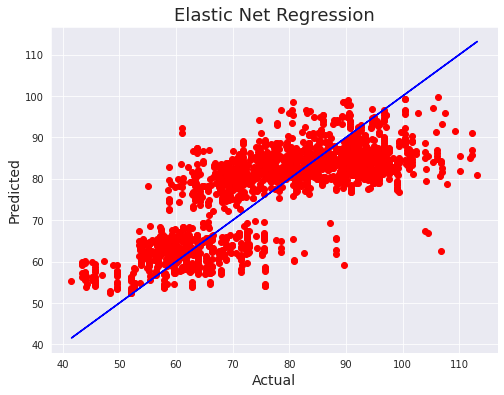

In [207]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_enr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Elastic Net Regression',fontsize=18)
plt.show()

CONCLUSION

OUTPUT
 


In [258]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_con=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con


Original  Predicted
0      78.698195  82.654481
1      52.043713  55.989648
2      83.149001  86.828159
3      57.382160  67.964442
4     100.965661  83.099028
...          ...        ...
2065   84.499421  87.460419
2066   54.096100  61.512552
2067   71.470029  82.055025
2068   45.654717  58.743220
2069   77.381976  87.996417

[2070 rows x 2 columns]

In [259]:
import pickle
filename='Flight_Price_Prediction_lr.pkl'
pickle.dump(lr,open(filename,'wb'))


In [260]:
models=['Linear Regression','Lasso regression','RandomForestRegressor','Ridge Regressor','Decison Tree Regressor','GradientBoostingRegressor'
,'Support Vector Regressor','ElasticNet Regression']
        


In [261]:
scores=[ lr_acc_score*100,ls_acc_score*100,rf_acc_score*100,rd_acc_score*100,dt_acc_score*100,gbr_acc_score*100,sv_acc_score*100,enr_acc_score*100]
scores

[61.309614233260135,
 47.889891010074834,
 61.309614233260135,
 61.3067473046385,
 53.02479099782496,
 61.309614233260135,
 61.309614233260135,
 61.309614233260135]

In [262]:
Nos=[]
for i in range(1,len(models)+1):
    Nos.append(i)
Nos    

[1, 2, 3, 4, 5, 6, 7, 8]

In [263]:
import pandas as pd
Model_scores=pd.DataFrame({})
Model_scores['Nos']=Nos
Model_scores['Model Names']=models
Model_scores['Scores']=scores
Model_scores.sort_values(by='Scores', ascending=False).style.hide_index()

CONCLUSION

From the above models,Linear Regression performs well,Because Linear regression fits linearly seperable datasets almost perfectly and is often used to find the nature of the relationship between variables.It find the target variable by finding a best suitable fit line between the independent and dependent variables.its main advantage is , the best fit line is the line with minimum error from all the points ,it has high efficiency.

So we save this model for our Prediction

The flight ticket prices mainly depends on Route,Duration,Distance and Total stops and other factors

In [265]:
df_con.to_csv("Flight_Price_Prediction_lr.csv",sep='\t')

MAKE PREDICTION BY USING OUR SEPERATE NEW TEST DATA SET 


Predict the output for new unseen Test data

In [268]:
pred_test_new_raw_data=lr.predict(test_input)
    

Get accuracy score for new unseen Test data 's Prediction

In [275]:
lr_acc_score_unseen_data=r2_score(test_target,pred_test_new_raw_data)

Compare Predicted Result with Unseen Result of new unseen Data

In [273]:
import numpy as np
a=np.array(test_target)
predicted=np.array(lr.predict(test_input))
df_con=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con


Original  Predicted
0     42.011188  82.317729
1     42.452366  72.569167
2     47.818089  83.394650
3     47.923560  81.571861
4     42.678886  59.728568
...         ...        ...
2511  40.518904  82.487496
2512  40.550992  59.008868
2513  46.288275  80.962032
2514  46.744334  82.057925
2515  48.776129  82.556292

[2516 rows x 2 columns]